### Importing the basic packages

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
import plotly.graph_objects as go
import plotly.express as px
from fbprophet import Prophet

In [14]:
data = pd.read_csv('/Users/subha/Downloads/covid_19_clean_complete.csv')
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0
...,...,...,...,...,...,...,...,...
11955,NaN,Aruba,12.5211,-69.9683,3/13/20,2,0,0
11956,Grand Princess,Canada,37.6489,-122.6655,3/13/20,2,0,0
11957,NaN,Kenya,-0.0236,37.9062,3/13/20,1,0,0
11958,NaN,Antigua and Barbuda,17.0608,-61.7964,3/13/20,1,0,0


In [50]:
data['Active'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,2
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,2
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11955,NaN,Aruba,12.5211,-69.9683,3/13/20,2,0,0,2
11956,Grand Princess,Canada,37.6489,-122.6655,3/13/20,2,0,0,2
11957,NaN,Kenya,-0.0236,37.9062,3/13/20,1,0,0,1
11958,NaN,Antigua and Barbuda,17.0608,-61.7964,3/13/20,1,0,0,1


In [101]:
data['Date'] = pd.to_datetime(data.Date)
print (data)

       Province/State       Country/Region      Lat      Long       Date  \
0                 NaN             Thailand  15.0000  101.0000 2020-01-22   
1                 NaN                Japan  36.0000  138.0000 2020-01-22   
2                 NaN            Singapore   1.2833  103.8333 2020-01-22   
3                 NaN                Nepal  28.1667   84.2500 2020-01-22   
4                 NaN             Malaysia   2.5000  112.5000 2020-01-22   
...               ...                  ...      ...       ...        ...   
11955             NaN                Aruba  12.5211  -69.9683 2020-03-13   
11956  Grand Princess               Canada  37.6489 -122.6655 2020-03-13   
11957             NaN                Kenya  -0.0236   37.9062 2020-03-13   
11958             NaN  Antigua and Barbuda  17.0608  -61.7964 2020-03-13   
11959         Alabama                   US  32.3182  -86.9023 2020-03-13   

       Confirmed  Deaths  Recovered  Active  
0              2       0          0      

In [102]:
data2 = data.groupby(["Date", "Country/Region"])[['Date', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
data2

,Date,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Antigua and Barbuda,0,0,0
...,...,...,...,...,...
6495,2020-03-13,US,2179,47,12
6496,2020-03-13,Ukraine,3,1,0
6497,2020-03-13,United Arab Emirates,85,0,17
6498,2020-03-13,United Kingdom,801,8,19


In [103]:
data.groupby("Country/Region")[['Confirmed', 'Deaths', 'Recovered','Active']].sum().reset_index()

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,47,0,0,47
1,Albania,80,3,0,77
2,Algeria,201,3,16,182
3,Andorra,12,0,1,11
4,Antigua and Barbuda,1,0,0,1
...,...,...,...,...,...
120,US,6793,151,40,6602
121,Ukraine,13,1,0,12
122,United Arab Emirates,887,0,178,709
123,United Kingdom,3643,42,294,3307


#### Total number of Confirmed COVID -19 cases

In [104]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
sortconfirmed = confirmed.sort_values(by='Confirmed')
print('confirmed cases: \n', sortconfirmed)

confirmed cases: 
          Date  Confirmed
0  2020-01-22        554
1  2020-01-23        652
2  2020-01-24        939
3  2020-01-25       1432
4  2020-01-26       2113
5  2020-01-27       2922
6  2020-01-28       5573
7  2020-01-29       6161
8  2020-01-30       8229
9  2020-01-31       9920
10 2020-02-01      12030
11 2020-02-02      16779
12 2020-02-03      19870
13 2020-02-04      23881
14 2020-02-05      27624
15 2020-02-06      30806
16 2020-02-07      34380
17 2020-02-08      37109
18 2020-02-09      40139
19 2020-02-10      42751
20 2020-02-11      44790
21 2020-02-12      45209
22 2020-02-13      60355
23 2020-02-14      66872
24 2020-02-15      69017
25 2020-02-16      71211
26 2020-02-17      73245
27 2020-02-18      75123
28 2020-02-19      75626
29 2020-02-20      76184
30 2020-02-21      76808
31 2020-02-22      78564
32 2020-02-23      78950
33 2020-02-24      79553
34 2020-02-25      80398
35 2020-02-26      81380
36 2020-02-27      82738
37 2020-02-28      84104
38 202

In [107]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sortconfirmed['Date'], 
                         y=sortconfirmed['Confirmed'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='blue', width=2)
                        ))
fig.update_layout(
    title='Total number of COVID - 19 Confirmed cases',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    )
)

#### Total number of Active COVID -19 cases

In [108]:
active = data.groupby('Date').sum()['Active'].reset_index()
sortactive = active.sort_values(by='Date')
print('active cases: \n', sortactive)

active cases: 
          Date  Active
0  2020-01-22     509
1  2020-01-23     604
2  2020-01-24     877
3  2020-01-25    1351
4  2020-01-26    2005
5  2020-01-27    2779
6  2020-01-28    5335
7  2020-01-29    5902
8  2020-01-30    7915
9  2020-01-31    9485
10 2020-02-01   11487
11 2020-02-02   15945
12 2020-02-03   18821
13 2020-02-04   22537
14 2020-02-05   25936
15 2020-02-06   28685
16 2020-02-07   31650
17 2020-02-08   33687
18 2020-02-09   35992
19 2020-02-10   37795
20 2020-02-11   38997
21 2020-02-12   38944
22 2020-02-13   52692
23 2020-02-14   57294
24 2020-02-15   57959
25 2020-02-16   58579
26 2020-02-17   58797
27 2020-02-18   58767
28 2020-02-19   57386
29 2020-02-20   55763
30 2020-02-21   55672
31 2020-02-22   53225
32 2020-02-23   53092
33 2020-02-24   51702
34 2020-02-25   49791
35 2020-02-26   48232
36 2020-02-27   46653
37 2020-02-28   44528
38 2020-02-29   43272
39 2020-03-01   42635
40 2020-03-02   41579
41 2020-03-03   41393
42 2020-03-04   40610
43 2020-03-05   

In [109]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sortactive['Date'], 
                         y=sortactive['Active'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='orange', width=2)
                        ))
fig.update_layout(
    title='Total number of COVID - 19 Active cases',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    )
)

#### Total number of Recovered COVID -19 cases

In [110]:
recovered = data.groupby('Date').sum()['Recovered'].reset_index()
sortrecovered = recovered.sort_values(by='Recovered')
print('recovered cases: \n', sortrecovered)

recovered cases: 
          Date  Recovered
0  2020-01-22         28
1  2020-01-23         30
2  2020-01-24         36
3  2020-01-25         39
4  2020-01-26         52
5  2020-01-27         61
6  2020-01-28        107
7  2020-01-29        126
8  2020-01-30        143
9  2020-01-31        222
10 2020-02-01        284
11 2020-02-02        472
12 2020-02-03        623
13 2020-02-04        852
14 2020-02-05       1124
15 2020-02-06       1487
16 2020-02-07       2011
17 2020-02-08       2616
18 2020-02-09       3241
19 2020-02-10       3943
20 2020-02-11       4680
21 2020-02-12       5147
22 2020-02-13       6292
23 2020-02-14       8055
24 2020-02-15       9392
25 2020-02-16      10862
26 2020-02-17      12580
27 2020-02-18      14349
28 2020-02-19      16118
29 2020-02-20      18174
30 2020-02-21      18885
31 2020-02-22      22881
32 2020-02-23      23389
33 2020-02-24      25222
34 2020-02-25      27899
35 2020-02-26      30378
36 2020-02-27      33271
37 2020-02-28      36704
38 202

In [112]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sortrecovered['Date'], 
                         y=sortrecovered['Recovered'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='Green', width=2)
                        ))
fig.update_layout(
    title='Total number of COVID - 19 Recovered cases',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    )
)

#### Total number of Deceased COVID -19 cases

In [113]:
death = data.groupby('Date').sum()['Deaths'].reset_index()
sortdeath = death.sort_values(by='Deaths')
print('death cases: \n', sortdeath)

death cases: 
          Date  Deaths
0  2020-01-22      17
1  2020-01-23      18
2  2020-01-24      26
3  2020-01-25      42
4  2020-01-26      56
5  2020-01-27      82
6  2020-01-28     131
7  2020-01-29     133
8  2020-01-30     171
9  2020-01-31     213
10 2020-02-01     259
11 2020-02-02     362
12 2020-02-03     426
13 2020-02-04     492
14 2020-02-05     564
15 2020-02-06     634
16 2020-02-07     719
17 2020-02-08     806
18 2020-02-09     906
19 2020-02-10    1013
20 2020-02-11    1113
21 2020-02-12    1118
22 2020-02-13    1371
23 2020-02-14    1523
24 2020-02-15    1666
25 2020-02-16    1770
26 2020-02-17    1868
27 2020-02-18    2007
28 2020-02-19    2122
29 2020-02-20    2247
30 2020-02-21    2251
31 2020-02-22    2458
32 2020-02-23    2469
33 2020-02-24    2629
34 2020-02-25    2708
35 2020-02-26    2770
36 2020-02-27    2814
37 2020-02-28    2872
38 2020-02-29    2940
39 2020-03-01    2995
40 2020-03-02    3079
41 2020-03-03    3153
42 2020-03-04    3243
43 2020-03-05    

In [167]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sortdeath['Date'], 
                         y=sortdeath['Deaths'],
                         mode='lines+markers',
                         name='Confirmed',
                         line=dict(color='red', width=2)
                        ))
fig.update_layout(
    title='Total number of COVID - 19 Deceased cases',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    )
)

#### Analyzing top 5 countries that are affected by COVID-19

In [124]:
Germany = data.loc[data["Country/Region"] == "Germany"]
print("Cases in Germany: \n",Germany)
China = data.loc[data["Country/Region"] == "China"]
print("Cases in China: \n",China)
Italy = data.loc[data["Country/Region"] == "Italy"]
print("Cases in Italy: \n",Italy)
Iran = data.loc[data["Country/Region"] == "Iran"]
print("Cases in Iran: \n",Iran)
Spain = data.loc[data["Country/Region"] == "Spain"]
print("Cases in US: \n",Spain)

Cases in Germany: 
       Province/State Country/Region   Lat  Long       Date  Confirmed  Deaths  \
11               NaN        Germany  51.0   9.0 2020-01-22          0       0   
241              NaN        Germany  51.0   9.0 2020-01-23          0       0   
471              NaN        Germany  51.0   9.0 2020-01-24          0       0   
701              NaN        Germany  51.0   9.0 2020-01-25          0       0   
931              NaN        Germany  51.0   9.0 2020-01-26          0       0   
1161             NaN        Germany  51.0   9.0 2020-01-27          1       0   
1391             NaN        Germany  51.0   9.0 2020-01-28          4       0   
1621             NaN        Germany  51.0   9.0 2020-01-29          4       0   
1851             NaN        Germany  51.0   9.0 2020-01-30          4       0   
2081             NaN        Germany  51.0   9.0 2020-01-31          5       0   
2311             NaN        Germany  51.0   9.0 2020-02-01          8       0   
2541    

##### Confirmed cases

In [127]:
Gerconfirmed = Germany.groupby('Date').sum()['Confirmed'].reset_index()
sortGerconfirmed = Gerconfirmed.sort_values(by='Date')
print('confirmed cases in Germany: \n', sortGerconfirmed)
Italyconfirmed = Italy.groupby('Date').sum()['Confirmed'].reset_index()
sortItalyconfirmed = Italyconfirmed.sort_values(by='Date')
print('confirmed cases in Italy: \n', sortItalyconfirmed)
Chinaconfirmed = China.groupby('Date').sum()['Confirmed'].reset_index()
sortChinaconfirmed = Chinaconfirmed.sort_values(by='Date')
print('confirmed cases in China: \n', sortChinaconfirmed)
Iranconfirmed = Iran.groupby('Date').sum()['Confirmed'].reset_index()
sortIranconfirmed = Iranconfirmed.sort_values(by='Date')
print('confirmed cases in Iran: \n',  sortIranconfirmed)
Spainconfirmed = Spain.groupby('Date').sum()['Confirmed'].reset_index()
sortSpainconfirmed = Spainconfirmed.sort_values(by='Date')
print('confirmed cases in Spain: \n', sortSpainconfirmed)

confirmed cases in Germany: 
          Date  Confirmed
0  2020-01-22          0
1  2020-01-23          0
2  2020-01-24          0
3  2020-01-25          0
4  2020-01-26          0
5  2020-01-27          1
6  2020-01-28          4
7  2020-01-29          4
8  2020-01-30          4
9  2020-01-31          5
10 2020-02-01          8
11 2020-02-02         10
12 2020-02-03         12
13 2020-02-04         12
14 2020-02-05         12
15 2020-02-06         12
16 2020-02-07         13
17 2020-02-08         13
18 2020-02-09         14
19 2020-02-10         14
20 2020-02-11         16
21 2020-02-12         16
22 2020-02-13         16
23 2020-02-14         16
24 2020-02-15         16
25 2020-02-16         16
26 2020-02-17         16
27 2020-02-18         16
28 2020-02-19         16
29 2020-02-20         16
30 2020-02-21         16
31 2020-02-22         16
32 2020-02-23         16
33 2020-02-24         16
34 2020-02-25         17
35 2020-02-26         27
36 2020-02-27         46
37 2020-02-28       

In [165]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sortChinaconfirmed['Date'], 
                         y=sortChinaconfirmed['Confirmed'],
                         mode='lines+markers',
                         name='China Confirmed',
                         line=dict(color='Dark Blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortGerconfirmed['Date'], 
                         y=sortGerconfirmed['Confirmed'],
                         mode='lines+markers',
                         name='Germany Confirmed',
                         line=dict(color='darkcyan', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortItalyconfirmed['Date'], 
                         y=sortItalyconfirmed['Confirmed'],
                         mode='lines+markers',
                         name='Italy Confirmed',
                         line=dict(color='blueviolet', width=2)
                        ))

fig.add_trace(go.Scatter(x=sortIranconfirmed['Date'], 
                         y=sortIranconfirmed['Confirmed'],
                         mode='lines+markers',
                         name='Iran Confirmed',
                         line=dict(color='cadetblue', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortSpainconfirmed['Date'], 
                         y=sortSpainconfirmed['Confirmed'],
                         mode='lines+markers',
                         name='Spain Confirmed',
                         line=dict(color='cornflowerblue', width=2)
                        ))
fig.update_layout(
    title='Top 5 countries affected by COVID - 19 Confirmed cases',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

##### Active cases

In [129]:
GerActive = Germany.groupby('Date').sum()['Active'].reset_index()
sortGerActive = GerActive.sort_values(by='Date')
print('Active cases in Germany: \n', sortGerActive)
ItalyActive = Italy.groupby('Date').sum()['Active'].reset_index()
sortItalyActive = ItalyActive.sort_values(by='Date')
print('Active cases in Italy: \n', sortItalyActive)
ChinaActive = China.groupby('Date').sum()['Active'].reset_index()
sortChinaActive = ChinaActive.sort_values(by='Date')
print('Active cases in China: \n', sortChinaActive)
IranActive = Iran.groupby('Date').sum()['Active'].reset_index()
sortIranActive = IranActive.sort_values(by='Date')
print('Active cases in Iran: \n',  sortIranActive)
SpainActive = Spain.groupby('Date').sum()['Active'].reset_index()
sortSpainActive = SpainActive.sort_values(by='Date')
print('Active cases in Spain: \n', sortSpainActive)

Active cases in Germany: 
          Date  Active
0  2020-01-22       0
1  2020-01-23       0
2  2020-01-24       0
3  2020-01-25       0
4  2020-01-26       0
5  2020-01-27       1
6  2020-01-28       4
7  2020-01-29       4
8  2020-01-30       4
9  2020-01-31       5
10 2020-02-01       8
11 2020-02-02      10
12 2020-02-03      12
13 2020-02-04      12
14 2020-02-05      12
15 2020-02-06      12
16 2020-02-07      13
17 2020-02-08      13
18 2020-02-09      14
19 2020-02-10      14
20 2020-02-11      16
21 2020-02-12      16
22 2020-02-13      15
23 2020-02-14      15
24 2020-02-15      15
25 2020-02-16      15
26 2020-02-17      15
27 2020-02-18       4
28 2020-02-19       4
29 2020-02-20       4
30 2020-02-21       2
31 2020-02-22       2
32 2020-02-23       2
33 2020-02-24       2
34 2020-02-25       3
35 2020-02-26      12
36 2020-02-27      30
37 2020-02-28      32
38 2020-02-29      63
39 2020-03-01     114
40 2020-03-02     143
41 2020-03-03     180
42 2020-03-04     246
43 20

In [164]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sortChinaActive['Date'], 
                         y=sortChinaActive['Active'],
                         mode='lines+markers',
                         name='China Active',
                         line=dict(color='Orange', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortGerActive['Date'], 
                         y=sortGerActive['Active'],
                         mode='lines+markers',
                         name='Germany Active',
                         line=dict(color='orangered', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortItalyActive['Date'], 
                         y=sortItalyActive['Active'],
                         mode='lines+markers',
                         name='Italy Active',
                         line=dict(color='firebrick', width=2)
                        ))

fig.add_trace(go.Scatter(x=sortIranActive['Date'], 
                         y=sortIranActive['Active'],
                         mode='lines+markers',
                         name='Iran Active',
                         line=dict(color='darkorange', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortSpainActive['Date'], 
                         y=sortSpainActive['Active'],
                         mode='lines+markers',
                         name='Spain Active',
                         line=dict(color='crimson', width=2)
                        ))
fig.update_layout(
    title='Top 5 countries affected by COVID - 19 Active cases',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)
#honeydew , firebrick, lime, limegreen,linen,

##### Recovered cases

In [142]:
GerRecovered = Germany.groupby('Date').sum()['Recovered'].reset_index()
sortGerRecovered = GerRecovered.sort_values(by='Date')
print('Recovered cases in Germany: \n', sortGerRecovered)
ItalyRecovered = Italy.groupby('Date').sum()['Recovered'].reset_index()
sortItalyRecovered = ItalyRecovered.sort_values(by='Date')
print('Recovered cases in Italy: \n', sortItalyRecovered)
ChinaRecovered = China.groupby('Date').sum()['Recovered'].reset_index()
sortChinaRecovered = ChinaRecovered.sort_values(by='Date')
print('Recovered cases in China: \n', sortChinaRecovered)
IranRecovered = Iran.groupby('Date').sum()['Recovered'].reset_index()
sortIranRecovered = IranRecovered.sort_values(by='Date')
print('Recovered cases in Iran: \n',  sortIranRecovered)
SpainRecovered = Spain.groupby('Date').sum()['Recovered'].reset_index()
sortSpainRecovered = SpainRecovered.sort_values(by='Date')
print('Recovered cases in Spain: \n', sortSpainRecovered)

Recovered cases in Germany: 
          Date  Recovered
0  2020-01-22          0
1  2020-01-23          0
2  2020-01-24          0
3  2020-01-25          0
4  2020-01-26          0
5  2020-01-27          0
6  2020-01-28          0
7  2020-01-29          0
8  2020-01-30          0
9  2020-01-31          0
10 2020-02-01          0
11 2020-02-02          0
12 2020-02-03          0
13 2020-02-04          0
14 2020-02-05          0
15 2020-02-06          0
16 2020-02-07          0
17 2020-02-08          0
18 2020-02-09          0
19 2020-02-10          0
20 2020-02-11          0
21 2020-02-12          0
22 2020-02-13          1
23 2020-02-14          1
24 2020-02-15          1
25 2020-02-16          1
26 2020-02-17          1
27 2020-02-18         12
28 2020-02-19         12
29 2020-02-20         12
30 2020-02-21         14
31 2020-02-22         14
32 2020-02-23         14
33 2020-02-24         14
34 2020-02-25         14
35 2020-02-26         15
36 2020-02-27         16
37 2020-02-28       

In [163]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sortChinaRecovered['Date'], 
                         y=sortChinaRecovered['Recovered'],
                         mode='lines+markers',
                         name='China Recovered',
                         line=dict(color='Green', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortGerRecovered['Date'], 
                         y=sortGerRecovered['Recovered'],
                         mode='lines+markers',
                         name='Germany Recovered',
                         line=dict(color='olive', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortItalyRecovered['Date'], 
                         y=sortItalyRecovered['Recovered'],
                         mode='lines+markers',
                         name='Italy Recovered',
                         line=dict(color='lime', width=2)
                        ))

fig.add_trace(go.Scatter(x=sortIranRecovered['Date'], 
                         y=sortIranRecovered['Recovered'],
                         mode='lines+markers',
                         name='Iran Recovered',
                         line=dict(color='limegreen', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortSpainRecovered['Date'], 
                         y=sortSpainRecovered['Recovered'],
                         mode='lines+markers',
                         name='Spain Recovered',
                         line=dict(color='darkgreen', width=2)
                        ))

fig.update_layout(
    title='Top 5 countries affected by COVID - 19 Recovered cases',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)



##### Deceased cases

In [144]:
GerDeath = Germany.groupby('Date').sum()['Deaths'].reset_index()
sortGerDeath = GerDeath.sort_values(by='Date')
print('Death cases in Germany: \n', sortGerDeath)
ItalyDeath = Italy.groupby('Date').sum()['Deaths'].reset_index()
sortItalyDeath = ItalyDeath.sort_values(by='Date')
print('Death cases in Italy: \n', sortItalyDeath)
ChinaDeath = China.groupby('Date').sum()['Deaths'].reset_index()
sortChinaDeath = ChinaDeath.sort_values(by='Date')
print('Death cases in China: \n', sortChinaDeath)
IranDeath = Iran.groupby('Date').sum()['Deaths'].reset_index()
sortIranDeath = IranDeath.sort_values(by='Date')
print('Death cases in Iran: \n',  sortIranDeath)
SpainDeath = Spain.groupby('Date').sum()['Deaths'].reset_index()
sortSpainDeath = SpainDeath.sort_values(by='Date')
print('Death cases in Spain: \n', sortSpainDeath)

Death cases in Germany: 
          Date  Deaths
0  2020-01-22       0
1  2020-01-23       0
2  2020-01-24       0
3  2020-01-25       0
4  2020-01-26       0
5  2020-01-27       0
6  2020-01-28       0
7  2020-01-29       0
8  2020-01-30       0
9  2020-01-31       0
10 2020-02-01       0
11 2020-02-02       0
12 2020-02-03       0
13 2020-02-04       0
14 2020-02-05       0
15 2020-02-06       0
16 2020-02-07       0
17 2020-02-08       0
18 2020-02-09       0
19 2020-02-10       0
20 2020-02-11       0
21 2020-02-12       0
22 2020-02-13       0
23 2020-02-14       0
24 2020-02-15       0
25 2020-02-16       0
26 2020-02-17       0
27 2020-02-18       0
28 2020-02-19       0
29 2020-02-20       0
30 2020-02-21       0
31 2020-02-22       0
32 2020-02-23       0
33 2020-02-24       0
34 2020-02-25       0
35 2020-02-26       0
36 2020-02-27       0
37 2020-02-28       0
38 2020-02-29       0
39 2020-03-01       0
40 2020-03-02       0
41 2020-03-03       0
42 2020-03-04       0
43 202

In [162]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sortChinaDeath['Date'], 
                         y=sortChinaDeath['Deaths'],
                         mode='lines+markers',
                         name='China Death',
                         line=dict(color='firebrick', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortGerDeath['Date'], 
                         y=sortGerDeath['Deaths'],
                         mode='lines+markers',
                         name='Germany Death',
                         line=dict(color='maroon', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortItalyDeath['Date'], 
                         y=sortItalyDeath['Deaths'],
                         mode='lines+markers',
                         name='Italy Death',
                         line=dict(color='indianred', width=2)
                        ))

fig.add_trace(go.Scatter(x=sortIranDeath['Date'], 
                         y=sortIranDeath['Deaths'],
                         mode='lines+markers',
                         name='Iran Active',
                         line=dict(color='darkred', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortSpainDeath['Date'], 
                         y=sortSpainDeath['Deaths'],
                         mode='lines+markers',
                         name='Spain Death',
                         line=dict(color='red', width=2)
                        ))
fig.update_layout(
    title='Top 5 countries affected by COVID - 19 Deceased cases',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

#firebrick, goldenrod, indianred

#### Bar Chart representation of COVID-19 cases in Germany - Confirmed, Active, Recovered, Deceased

In [169]:
fig = go.Figure()
fig.add_trace(go.Bar(x=sortGerconfirmed['Date'],
                y=sortGerconfirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=sortGerActive['Date'],
                y=sortGerActive['Active'],
                name='Active',
                marker_color='Orange'
                ))
fig.add_trace(go.Bar(x=sortGerRecovered['Date'],
                y=sortGerRecovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))
fig.add_trace(go.Bar(x=sortGerDeath['Date'],
                y=sortGerDeath['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))


fig.update_layout(
    title='COVID-19 cases in Germany - Confirmed, Active, Recovered, Deceased',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.30, 
    bargroupgap=0.1 
)

#### Bar Chart representation of COVID-19 cases in China - Confirmed, Active, Recovered, Deceased

In [170]:
fig = go.Figure()
fig.add_trace(go.Bar(x=sortChinaconfirmed['Date'],
                y=sortChinaconfirmed['Confirmed'],
                name='Confirmed',
                marker_color='blue'
                ))
fig.add_trace(go.Bar(x=sortChinaActive['Date'],
                y=sortChinaActive['Active'],
                name='Active',
                marker_color='Orange'
                ))
fig.add_trace(go.Bar(x=sortChinaRecovered['Date'],
                y=sortChinaRecovered['Recovered'],
                name='Recovered',
                marker_color='Green'
                ))
fig.add_trace(go.Bar(x=sortChinaDeath['Date'],
                y=sortChinaDeath['Deaths'],
                name='Deaths',
                marker_color='Red'
                ))


fig.update_layout(
    title='COVID-19 cases in China - Confirmed, Active, Recovered, Deceased',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.30, 
    bargroupgap=0.1 
)

## Forecasting with Prophet

Prophet is a open source time series prediction. Prophet decomposes time series into trend, seasonality and holiday. 
Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
For prophet to work, the column names must be renamed to 'ds' and 'y'.
Below i have implemented Prophet for top 5 countries that was analyzed earlier to predict their values for a week on the confirmed and deceased cases.

#### Forecast for Germany

In [268]:
Gerconfirmed.columns = ['ds','y']
Gerconfirmed.tail(10)

,ds,y
42,2020-03-04,262
43,2020-03-05,482
44,2020-03-06,670
45,2020-03-07,799
46,2020-03-08,1040
47,2020-03-09,1176
48,2020-03-10,1457
49,2020-03-11,1908
50,2020-03-12,2078
51,2020-03-13,3675


In [269]:
model = Prophet(yearly_seasonality=True, interval_width=0.95)
model.fit(Gerconfirmed)
futurePrediction = model.make_future_dataframe(periods=7)
futurePrediction_confirmed = futurePrediction.copy() 
futurePrediction.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of forecast: 
            ds          yhat    yhat_lower    yhat_upper
0  2020-01-22      1.950450   -166.599849    163.741403
1  2020-01-23    -52.566497   -217.831700    123.717818
2  2020-01-24     54.079673   -108.838789    213.165874
3  2020-01-25      6.406858   -158.672446    189.229524
4  2020-01-26     17.734311   -154.940406    185.002128
5  2020-01-27      0.594312   -161.753409    164.658171
6  2020-01-28     -9.235660   -166.919499    157.458099
7  2020-01-29     -9.769044   -183.058544    159.150656
8  2020-01-30    -43.057385   -216.442900    127.058124
9  2020-01-31     68.907078    -90.702180    252.681447
10 2020-02-01     17.686985   -150.995867    182.455178
11 2020-02-02     21.942087   -144.042113    178.725475
12 2020-02-03     -2.062143   -183.073832    175.734091
13 2020-02-04    -16.261379   -169.130476    152.751735
14 2020-02-05    -17.618615   -180.140737    143.474422
15 2020-02-06    -48.128435   -219.090380    118.765588
16 2020-02-07     69.5

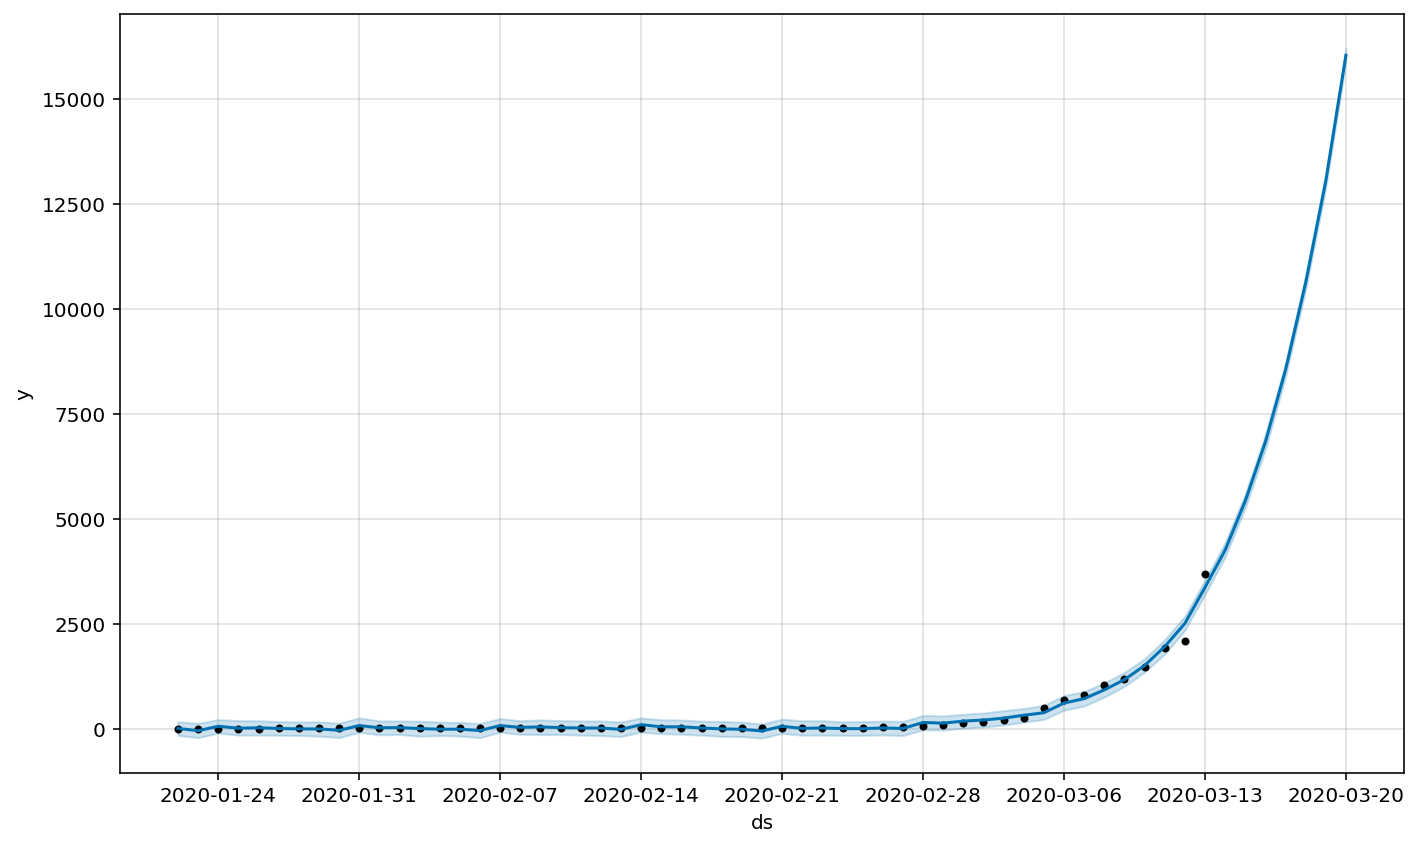

In [192]:
predictionForecast = model.predict(futurePrediction)
print('Prediction of forecast: \n', predictionForecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

confirmed_prediction = model.plot(predictionForecast)

In [351]:
germanygroup = data2.loc[data2["Country/Region"] == "Germany"]
germanygroup = germanygroup[['Date', 'Confirmed', 'Country/Region']].reset_index()
print(germanygroup)

    index       Date  Confirmed Country/Region
0      47 2020-01-22          0        Germany
1     172 2020-01-23          0        Germany
2     297 2020-01-24          0        Germany
3     422 2020-01-25          0        Germany
4     547 2020-01-26          0        Germany
5     672 2020-01-27          1        Germany
6     797 2020-01-28          4        Germany
7     922 2020-01-29          4        Germany
8    1047 2020-01-30          4        Germany
9    1172 2020-01-31          5        Germany
10   1297 2020-02-01          8        Germany
11   1422 2020-02-02         10        Germany
12   1547 2020-02-03         12        Germany
13   1672 2020-02-04         12        Germany
14   1797 2020-02-05         12        Germany
15   1922 2020-02-06         12        Germany
16   2047 2020-02-07         13        Germany
17   2172 2020-02-08         13        Germany
18   2297 2020-02-09         14        Germany
19   2422 2020-02-10         14        Germany
20   2547 202

In [355]:
days_to_forecast = 7
f_df = predictionForecast[['ds', 'yhat']]
f_df.rename(columns={'yhat':'Confirmed'}, inplace=True)
f_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
f_df.loc[f_df['Confirmed'] < 0, 'Confirmed'] = 0
f_df['Country/Region'] = 'Germany'
p_val = f_df.tail(7)
result = germanygroup.append(p_val)
result = result[['Date', 'Confirmed', 'Country/Region']]
print('result: \n', result)


result: 
          Date  Confirmed Country/Region
0  2020-01-22          0        Germany
1  2020-01-23          0        Germany
2  2020-01-24          0        Germany
3  2020-01-25          0        Germany
4  2020-01-26          0        Germany
5  2020-01-27          1        Germany
6  2020-01-28          4        Germany
7  2020-01-29          4        Germany
8  2020-01-30          4        Germany
9  2020-01-31          5        Germany
10 2020-02-01          8        Germany
11 2020-02-02         10        Germany
12 2020-02-03         12        Germany
13 2020-02-04         12        Germany
14 2020-02-05         12        Germany
15 2020-02-06         12        Germany
16 2020-02-07         13        Germany
17 2020-02-08         13        Germany
18 2020-02-09         14        Germany
19 2020-02-10         14        Germany
20 2020-02-11         16        Germany
21 2020-02-12         16        Germany
22 2020-02-13         16        Germany
23 2020-02-14         16      

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [381]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result['Date'], 
                         y=result['Confirmed'],
                         mode='lines+markers',
                         name='Germany Confirmed cases after Prediction',
                         line=dict(color='Dark Blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortGerconfirmed['Date'],
                y=sortGerconfirmed['Confirmed'],
                mode='lines+markers',
                name='Confirmed cases before prediction',
                line=dict(color='darkcyan', width=2)
                ))
fig.update_layout(
    title='Confirmed cases in Germany based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

##### Deceased case prediction in Germany

In [389]:
GerDeath.columns = ['ds','y']
GerDeath.tail(10)

,ds,y
42,2020-03-04,0
43,2020-03-05,0
44,2020-03-06,0
45,2020-03-07,0
46,2020-03-08,0
47,2020-03-09,2
48,2020-03-10,2
49,2020-03-11,3
50,2020-03-12,3
51,2020-03-13,7


In [360]:
modelDeath = Prophet(yearly_seasonality=True, interval_width=0.95)
modelDeath.fit(GerDeath)
futureDeathPrediction = modelDeath.make_future_dataframe(periods=7)
futureDeathPrediction_confirmed = futureDeathPrediction.copy() 
futureDeathPrediction.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of Deceased case: 
            ds  yhat  yhat_lower  yhat_upper
0  2020-01-22    -0          -0           1
1  2020-01-23    -0          -1           0
2  2020-01-24     0          -0           1
3  2020-01-25     0          -0           0
4  2020-01-26    -0          -1           0
5  2020-01-27     0          -0           1
6  2020-01-28     0          -1           1
7  2020-01-29     0          -0           0
8  2020-01-30    -0          -1           0
9  2020-01-31     0          -0           1
10 2020-02-01    -0          -1           0
11 2020-02-02    -0          -1           0
12 2020-02-03     0          -0           1
13 2020-02-04     0          -0           1
14 2020-02-05     0          -0           1
15 2020-02-06    -0          -1           0
16 2020-02-07     0          -0           1
17 2020-02-08     0          -0           0
18 2020-02-09    -0          -1           0
19 2020-02-10     0          -0           1
20 2020-02-11     0          -0           1
2

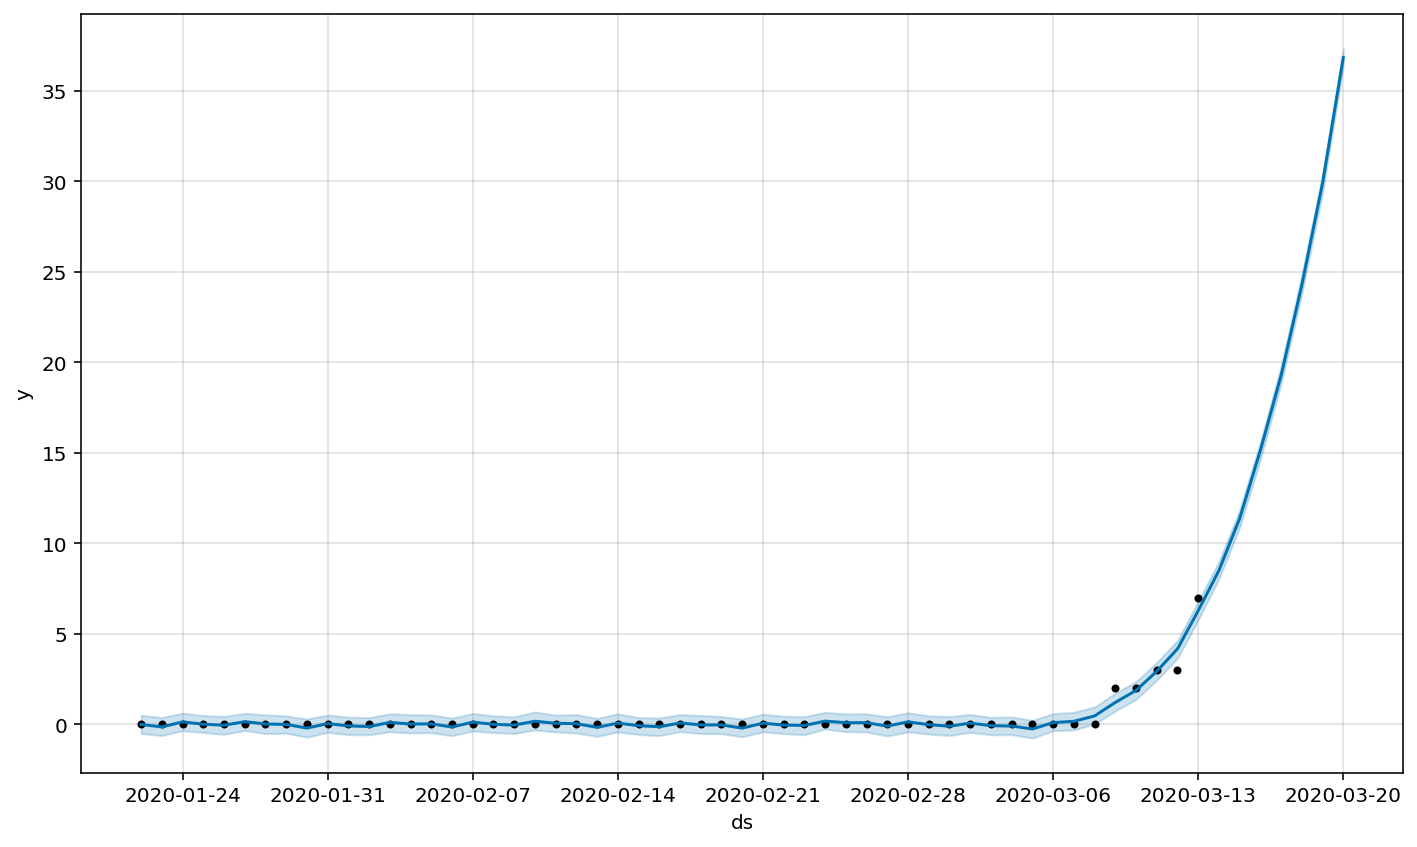

In [384]:
predictionDeathForecast = modelDeath.predict(futureDeathPrediction)
print('Prediction of Deceased case: \n', predictionDeathForecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

Death_prediction = modelDeath.plot(predictionDeathForecast)

In [372]:
datadeath = data.groupby(["Date", "Country/Region"])[['Date', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
germanygroupDeath = datadeath.loc[datadeath["Country/Region"] == "Germany"]
germanygroupDeath = germanygroupDeath[['Date', 'Deaths', 'Country/Region']].reset_index()
print(germanygroupDeath)


    index       Date  Deaths Country/Region
0      47 2020-01-22       0        Germany
1     172 2020-01-23       0        Germany
2     297 2020-01-24       0        Germany
3     422 2020-01-25       0        Germany
4     547 2020-01-26       0        Germany
5     672 2020-01-27       0        Germany
6     797 2020-01-28       0        Germany
7     922 2020-01-29       0        Germany
8    1047 2020-01-30       0        Germany
9    1172 2020-01-31       0        Germany
10   1297 2020-02-01       0        Germany
11   1422 2020-02-02       0        Germany
12   1547 2020-02-03       0        Germany
13   1672 2020-02-04       0        Germany
14   1797 2020-02-05       0        Germany
15   1922 2020-02-06       0        Germany
16   2047 2020-02-07       0        Germany
17   2172 2020-02-08       0        Germany
18   2297 2020-02-09       0        Germany
19   2422 2020-02-10       0        Germany
20   2547 2020-02-11       0        Germany
21   2672 2020-02-12       0    

In [373]:
days_to_forecast = 7
fd_df = predictionDeathForecast[['ds', 'yhat']]
fd_df.rename(columns={'yhat':'Deaths'}, inplace=True)
fd_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
fd_df.loc[fd_df['Deaths'] < 0, 'Deaths'] = 0
fd_df['Country/Region'] = 'Germany'
pd_val = fd_df.tail(7)
resultDeath = germanygroupDeath.append(pd_val)
resultDeath = resultDeath[['Date', 'Deaths', 'Country/Region']]
print('Death result: \n', resultDeath)



Death result: 
          Date  Deaths Country/Region
0  2020-01-22       0        Germany
1  2020-01-23       0        Germany
2  2020-01-24       0        Germany
3  2020-01-25       0        Germany
4  2020-01-26       0        Germany
5  2020-01-27       0        Germany
6  2020-01-28       0        Germany
7  2020-01-29       0        Germany
8  2020-01-30       0        Germany
9  2020-01-31       0        Germany
10 2020-02-01       0        Germany
11 2020-02-02       0        Germany
12 2020-02-03       0        Germany
13 2020-02-04       0        Germany
14 2020-02-05       0        Germany
15 2020-02-06       0        Germany
16 2020-02-07       0        Germany
17 2020-02-08       0        Germany
18 2020-02-09       0        Germany
19 2020-02-10       0        Germany
20 2020-02-11       0        Germany
21 2020-02-12       0        Germany
22 2020-02-13       0        Germany
23 2020-02-14       0        Germany
24 2020-02-15       0        Germany
25 2020-02-16       0 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [382]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resultDeath['Date'], 
                         y=resultDeath['Deaths'],
                         mode='lines+markers',
                         name='Germany Death after predicction',
                         line=dict(color='firebrick', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortGerDeath['Date'],
                y=sortGerDeath['Deaths'],
                mode='lines+markers',
                name='Deaths before prediction',
                line=dict(color='Red', width=2)
                ))
fig.update_layout(
    title='Deceased cases in Germany based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

### Forecast for Italy

##### Italy Confirmed case 

In [410]:
Italyconfirmed.columns = ['ds','y']
Italyconfirmed.tail(10)

,ds,y
42,2020-03-04,3089
43,2020-03-05,3858
44,2020-03-06,4636
45,2020-03-07,5883
46,2020-03-08,7375
47,2020-03-09,9172
48,2020-03-10,10149
49,2020-03-11,12462
50,2020-03-12,12462
51,2020-03-13,17660


In [416]:
Italy_model = Prophet(yearly_seasonality=True,interval_width=0.95)
Italy_model.fit(Italyconfirmed)
futurePredictionItaly = Italy_model.make_future_dataframe(periods=7)
futurePredictionItaly_confirmed = futurePredictionItaly.copy() 
futurePredictionItaly.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of confirmed cases in Italy: 
            ds   yhat  yhat_lower  yhat_upper
0  2020-01-22    101        -505         680
1  2020-01-23   -218        -829         360
2  2020-01-24     79        -473         612
3  2020-01-25    -22        -580         527
4  2020-01-26     52        -492         577
5  2020-01-27     95        -489         618
6  2020-01-28     -8        -577         511
7  2020-01-29     29        -479         577
8  2020-01-30   -235        -792         342
9  2020-01-31     87        -480         692
10 2020-02-01     -8        -532         536
11 2020-02-02     61        -464         603
12 2020-02-03     95        -482         629
13 2020-02-04    -17        -552         525
14 2020-02-05     15        -574         570
15 2020-02-06   -250        -757         253
16 2020-02-07     75        -523         608
17 2020-02-08    -14        -577         540
18 2020-02-09     64        -441         611
19 2020-02-10    107        -471         624
20 2020-02-11

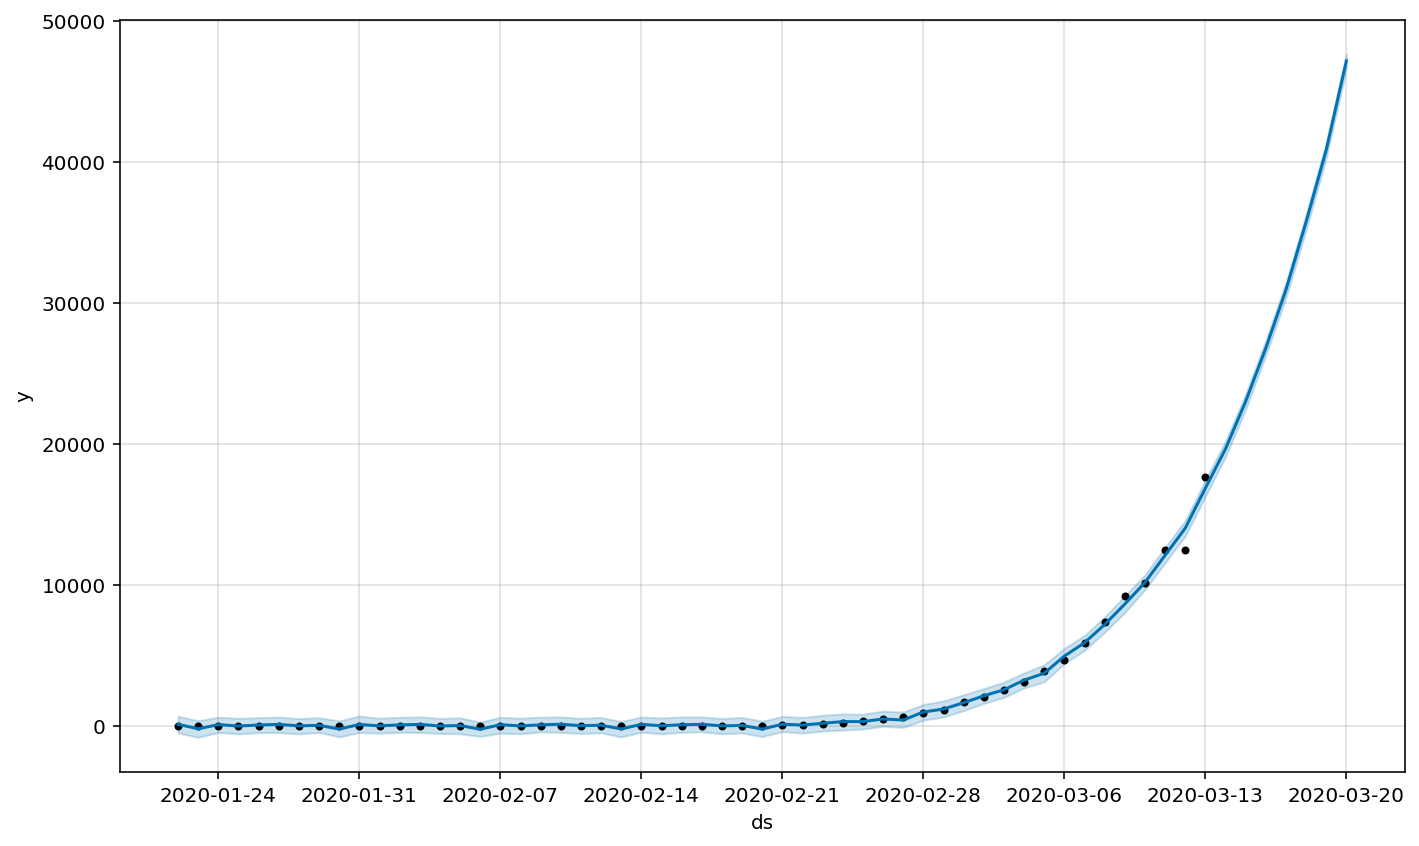

In [417]:
predictionForecastItaly = Italy_model.predict(futurePredictionItaly)
print('Prediction of confirmed cases in Italy: \n', predictionForecastItaly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

confirmed_predictionItaly = Italy_model.plot(predictionForecastItaly)

In [413]:
Italygroup = data2.loc[data2["Country/Region"] == "Italy"]
Italygroup = Italygroup[['Date', 'Confirmed', 'Country/Region']].reset_index()
print(Italygroup)

    index       Date  Confirmed Country/Region
0      62 2020-01-22          0          Italy
1     187 2020-01-23          0          Italy
2     312 2020-01-24          0          Italy
3     437 2020-01-25          0          Italy
4     562 2020-01-26          0          Italy
5     687 2020-01-27          0          Italy
6     812 2020-01-28          0          Italy
7     937 2020-01-29          0          Italy
8    1062 2020-01-30          0          Italy
9    1187 2020-01-31          2          Italy
10   1312 2020-02-01          2          Italy
11   1437 2020-02-02          2          Italy
12   1562 2020-02-03          2          Italy
13   1687 2020-02-04          2          Italy
14   1812 2020-02-05          2          Italy
15   1937 2020-02-06          2          Italy
16   2062 2020-02-07          3          Italy
17   2187 2020-02-08          3          Italy
18   2312 2020-02-09          3          Italy
19   2437 2020-02-10          3          Italy
20   2562 202

In [419]:
days_to_forecast = 7
fi_df = predictionForecastItaly[['ds', 'yhat']]
fi_df.rename(columns={'yhat':'Confirmed'}, inplace=True)
fi_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
fi_df.loc[fi_df['Confirmed'] < 0, 'Confirmed'] = 0
fi_df['Country/Region'] = 'Italy'
pi_val = fi_df.tail(7)
result_Italy = Italygroup.append(pi_val)
result_Italy = result_Italy[['Date', 'Confirmed', 'Country/Region']]
print('result: \n', result_Italy)

result: 
          Date  Confirmed Country/Region
0  2020-01-22          0          Italy
1  2020-01-23          0          Italy
2  2020-01-24          0          Italy
3  2020-01-25          0          Italy
4  2020-01-26          0          Italy
5  2020-01-27          0          Italy
6  2020-01-28          0          Italy
7  2020-01-29          0          Italy
8  2020-01-30          0          Italy
9  2020-01-31          2          Italy
10 2020-02-01          2          Italy
11 2020-02-02          2          Italy
12 2020-02-03          2          Italy
13 2020-02-04          2          Italy
14 2020-02-05          2          Italy
15 2020-02-06          2          Italy
16 2020-02-07          3          Italy
17 2020-02-08          3          Italy
18 2020-02-09          3          Italy
19 2020-02-10          3          Italy
20 2020-02-11          3          Italy
21 2020-02-12          3          Italy
22 2020-02-13          3          Italy
23 2020-02-14          3      

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [420]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result_Italy['Date'], 
                         y=result_Italy['Confirmed'],
                         mode='lines+markers',
                         name='Italy Confirmed cases after Prediction',
                         line=dict(color='Dark Blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortItalyconfirmed['Date'],
                y=sortItalyconfirmed['Confirmed'],
                mode='lines+markers',
                name='Confirmed cases before prediction',
                line=dict(color='darkcyan', width=2)
                ))
fig.update_layout(
    title='Confirmed cases in Italy based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

##### Italy deceased case

In [421]:
ItalyDeath.columns = ['ds','y']
ItalyDeath.tail(10)

,ds,y
42,2020-03-04,107
43,2020-03-05,148
44,2020-03-06,197
45,2020-03-07,233
46,2020-03-08,366
47,2020-03-09,463
48,2020-03-10,631
49,2020-03-11,827
50,2020-03-12,827
51,2020-03-13,1266


In [423]:
Italy_modelDeath = Prophet(yearly_seasonality=True, interval_width=0.95)
Italy_modelDeath.fit(ItalyDeath)
futureDeathPredictionItaly = Italy_modelDeath.make_future_dataframe(periods=7)
futureDeathPredictionItaly_confirmed = futureDeathPredictionItaly.copy() 
futureDeathPredictionItaly.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of Deceased case: 
            ds  yhat  yhat_lower  yhat_upper
0  2020-01-22     7         -38          45
1  2020-01-23   -16         -61          25
2  2020-01-24     9         -33          52
3  2020-01-25    -3         -46          40
4  2020-01-26     2         -41          47
5  2020-01-27     1         -40          47
6  2020-01-28     5         -39          48
7  2020-01-29     8         -40          52
8  2020-01-30   -18         -59          24
9  2020-01-31     6         -38          49
10 2020-02-01    -6         -51          39
11 2020-02-02     0         -43          42
12 2020-02-03    -1         -43          43
13 2020-02-04     5         -39          49
14 2020-02-05     9         -33          50
15 2020-02-06   -16         -61          27
16 2020-02-07     8         -37          50
17 2020-02-08    -4         -45          40
18 2020-02-09     2         -44          47
19 2020-02-10     1         -45          43
20 2020-02-11     6         -40          47
2

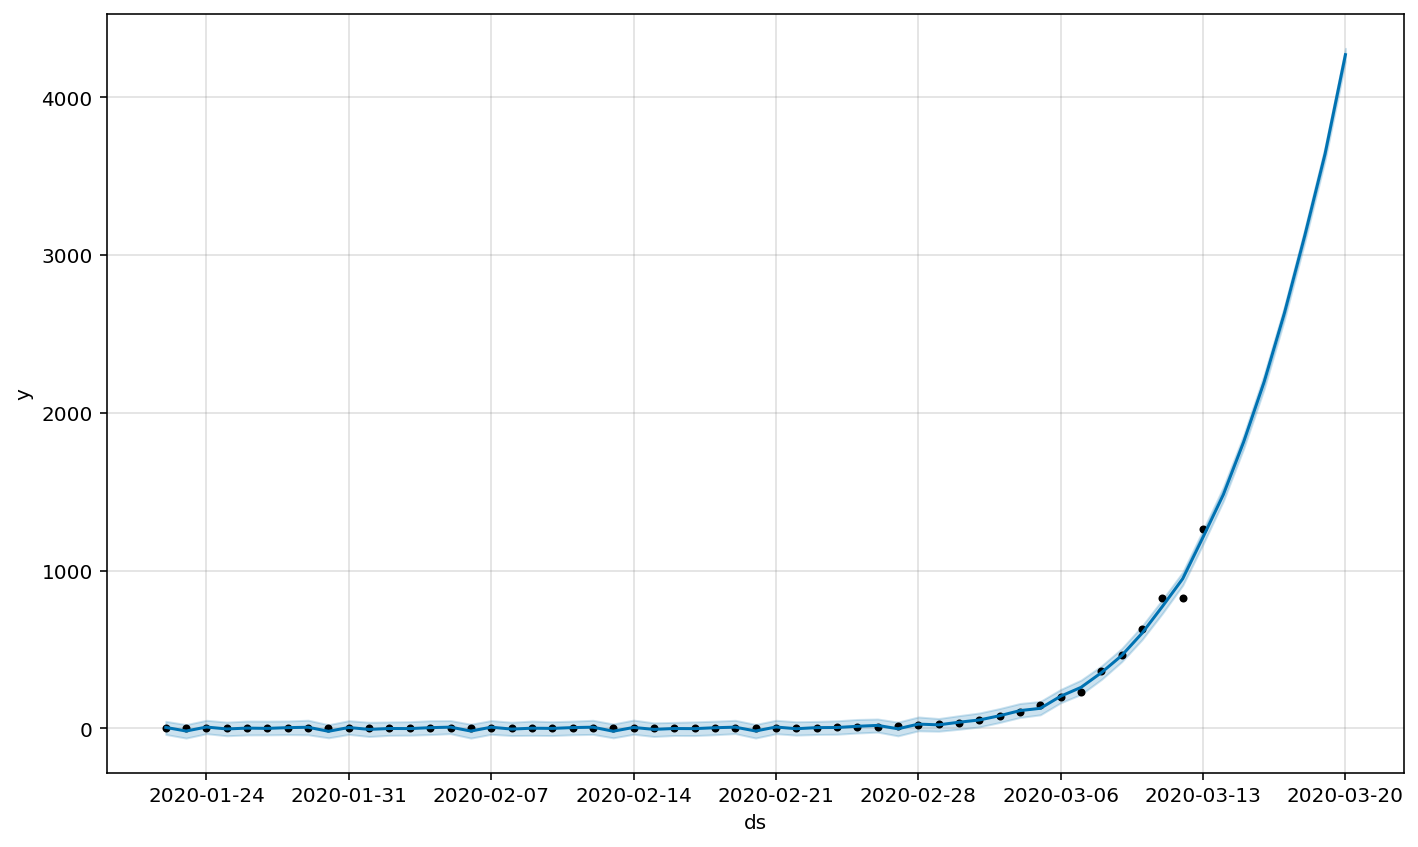

In [424]:
predictionDeathForecastItaly = Italy_modelDeath.predict(futureDeathPredictionItaly)
print('Prediction of Deceased case: \n', predictionDeathForecastItaly[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

Death_predictionItaly = Italy_modelDeath.plot(predictionDeathForecastItaly)

In [425]:
Italy_datadeath = data.groupby(["Date", "Country/Region"])[['Date', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
ItalygroupDeath = Italy_datadeath.loc[Italy_datadeath["Country/Region"] == "Italy"]
ItalygroupDeath = ItalygroupDeath[['Date', 'Deaths', 'Country/Region']].reset_index()
print(ItalygroupDeath)

    index       Date  Deaths Country/Region
0      62 2020-01-22       0          Italy
1     187 2020-01-23       0          Italy
2     312 2020-01-24       0          Italy
3     437 2020-01-25       0          Italy
4     562 2020-01-26       0          Italy
5     687 2020-01-27       0          Italy
6     812 2020-01-28       0          Italy
7     937 2020-01-29       0          Italy
8    1062 2020-01-30       0          Italy
9    1187 2020-01-31       0          Italy
10   1312 2020-02-01       0          Italy
11   1437 2020-02-02       0          Italy
12   1562 2020-02-03       0          Italy
13   1687 2020-02-04       0          Italy
14   1812 2020-02-05       0          Italy
15   1937 2020-02-06       0          Italy
16   2062 2020-02-07       0          Italy
17   2187 2020-02-08       0          Italy
18   2312 2020-02-09       0          Italy
19   2437 2020-02-10       0          Italy
20   2562 2020-02-11       0          Italy
21   2687 2020-02-12       0    

In [426]:
days_to_forecast = 7
fdi_df = predictionDeathForecastItaly[['ds', 'yhat']]
fdi_df.rename(columns={'yhat':'Deaths'}, inplace=True)
fdi_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
fdi_df.loc[fdi_df['Deaths'] < 0, 'Deaths'] = 0
fdi_df['Country/Region'] = 'Italy'
pdi_val = fdi_df.tail(7)
resultDeath_Italy = ItalygroupDeath.append(pdi_val)
resultDeath_Italy = resultDeath_Italy[['Date', 'Deaths', 'Country/Region']]
print('Death result: \n', resultDeath_Italy)

Death result: 
          Date  Deaths Country/Region
0  2020-01-22       0          Italy
1  2020-01-23       0          Italy
2  2020-01-24       0          Italy
3  2020-01-25       0          Italy
4  2020-01-26       0          Italy
5  2020-01-27       0          Italy
6  2020-01-28       0          Italy
7  2020-01-29       0          Italy
8  2020-01-30       0          Italy
9  2020-01-31       0          Italy
10 2020-02-01       0          Italy
11 2020-02-02       0          Italy
12 2020-02-03       0          Italy
13 2020-02-04       0          Italy
14 2020-02-05       0          Italy
15 2020-02-06       0          Italy
16 2020-02-07       0          Italy
17 2020-02-08       0          Italy
18 2020-02-09       0          Italy
19 2020-02-10       0          Italy
20 2020-02-11       0          Italy
21 2020-02-12       0          Italy
22 2020-02-13       0          Italy
23 2020-02-14       0          Italy
24 2020-02-15       0          Italy
25 2020-02-16       0 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [427]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resultDeath_Italy['Date'], 
                         y=resultDeath_Italy['Deaths'],
                         mode='lines+markers',
                         name='Italy Death after predicction',
                         line=dict(color='firebrick', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortItalyDeath['Date'],
                y=sortItalyDeath['Deaths'],
                mode='lines+markers',
                name='Deaths before prediction',
                line=dict(color='Red', width=2)
                ))
fig.update_layout(
    title='Deceased cases in Italy based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

### Forecast for Spain

##### Spain Confirmed case

In [428]:
Spainconfirmed.columns = ['ds','y']
Spainconfirmed.tail(10)

,ds,y
42,2020-03-04,222
43,2020-03-05,259
44,2020-03-06,400
45,2020-03-07,500
46,2020-03-08,673
47,2020-03-09,1073
48,2020-03-10,1695
49,2020-03-11,2277
50,2020-03-12,2277
51,2020-03-13,5232


In [429]:
Spain_model = Prophet(yearly_seasonality=True,interval_width=0.95)
Spain_model.fit(Spainconfirmed)
futurePredictionSpain = Spain_model.make_future_dataframe(periods=7)
futurePredictionSpain_confirmed = futurePredictionSpain.copy() 
futurePredictionSpain.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of confirmed cases in Spain: 
            ds   yhat  yhat_lower  yhat_upper
0  2020-01-22     -4        -337         327
1  2020-01-23   -112        -424         212
2  2020-01-24    113        -202         421
3  2020-01-25     26        -268         348
4  2020-01-26     19        -319         332
5  2020-01-27     21        -312         315
6  2020-01-28     29        -269         354
7  2020-01-29      2        -293         330
8  2020-01-30   -136        -455         189
9  2020-01-31     68        -230         379
10 2020-02-01    -27        -348         275
11 2020-02-02    -33        -357         265
12 2020-02-03    -20        -336         275
13 2020-02-04      6        -294         323
14 2020-02-05      1        -327         319
15 2020-02-06   -116        -417         220
16 2020-02-07    108        -219         407
17 2020-02-08     27        -294         335
18 2020-02-09     28        -271         351
19 2020-02-10     41        -273         329
20 2020-02-11

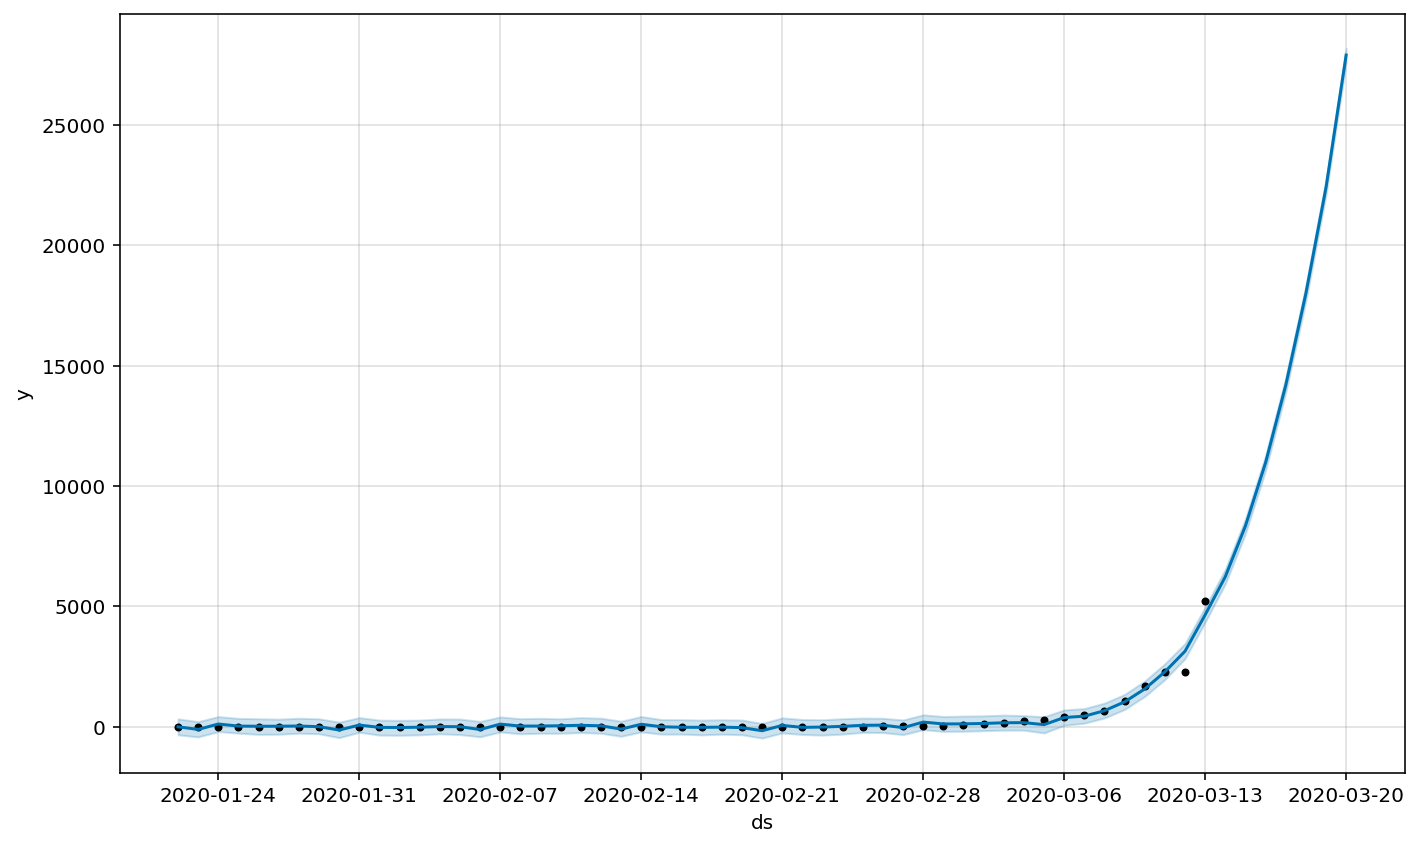

In [430]:
predictionForecastSpain = Spain_model.predict(futurePredictionSpain)
print('Prediction of confirmed cases in Spain: \n', predictionForecastSpain[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

confirmed_predictionSpain = Spain_model.plot(predictionForecastSpain)

In [431]:
Spaingroup = data2.loc[data2["Country/Region"] == "Spain"]
Spaingroup = Spaingroup[['Date', 'Confirmed', 'Country/Region']].reset_index()
print(Spaingroup)

    index       Date  Confirmed Country/Region
0     110 2020-01-22          0          Spain
1     235 2020-01-23          0          Spain
2     360 2020-01-24          0          Spain
3     485 2020-01-25          0          Spain
4     610 2020-01-26          0          Spain
5     735 2020-01-27          0          Spain
6     860 2020-01-28          0          Spain
7     985 2020-01-29          0          Spain
8    1110 2020-01-30          0          Spain
9    1235 2020-01-31          0          Spain
10   1360 2020-02-01          1          Spain
11   1485 2020-02-02          1          Spain
12   1610 2020-02-03          1          Spain
13   1735 2020-02-04          1          Spain
14   1860 2020-02-05          1          Spain
15   1985 2020-02-06          1          Spain
16   2110 2020-02-07          1          Spain
17   2235 2020-02-08          1          Spain
18   2360 2020-02-09          2          Spain
19   2485 2020-02-10          2          Spain
20   2610 202

In [433]:
days_to_forecast = 7
fs_df = predictionForecastSpain[['ds', 'yhat']]
fs_df.rename(columns={'yhat':'Confirmed'}, inplace=True)
fs_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
fs_df.loc[fs_df['Confirmed'] < 0, 'Confirmed'] = 0
fs_df['Country/Region'] = 'Spain'
ps_val = fs_df.tail(7)
result_Spain = Spaingroup.append(ps_val)
result_Spain = result_Spain[['Date', 'Confirmed', 'Country/Region']]
print('result: \n', result_Spain)

result: 
          Date  Confirmed Country/Region
0  2020-01-22          0          Spain
1  2020-01-23          0          Spain
2  2020-01-24          0          Spain
3  2020-01-25          0          Spain
4  2020-01-26          0          Spain
5  2020-01-27          0          Spain
6  2020-01-28          0          Spain
7  2020-01-29          0          Spain
8  2020-01-30          0          Spain
9  2020-01-31          0          Spain
10 2020-02-01          1          Spain
11 2020-02-02          1          Spain
12 2020-02-03          1          Spain
13 2020-02-04          1          Spain
14 2020-02-05          1          Spain
15 2020-02-06          1          Spain
16 2020-02-07          1          Spain
17 2020-02-08          1          Spain
18 2020-02-09          2          Spain
19 2020-02-10          2          Spain
20 2020-02-11          2          Spain
21 2020-02-12          2          Spain
22 2020-02-13          2          Spain
23 2020-02-14          2      

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [434]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result_Spain['Date'], 
                         y=result_Spain['Confirmed'],
                         mode='lines+markers',
                         name='Spain Confirmed cases after Prediction',
                         line=dict(color='Dark Blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortSpainconfirmed['Date'],
                y=sortSpainconfirmed['Confirmed'],
                mode='lines+markers',
                name='Confirmed cases before prediction',
                line=dict(color='darkcyan', width=2)
                ))
fig.update_layout(
    title='Confirmed cases in Spain based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

##### Spain deceased case

In [435]:
SpainDeath.columns = ['ds','y']
SpainDeath.tail(10)

,ds,y
42,2020-03-04,2
43,2020-03-05,3
44,2020-03-06,5
45,2020-03-07,10
46,2020-03-08,17
47,2020-03-09,28
48,2020-03-10,35
49,2020-03-11,54
50,2020-03-12,55
51,2020-03-13,133


In [439]:
Spain_modelDeath = Prophet(yearly_seasonality=True, interval_width=0.95)
Spain_modelDeath.fit(SpainDeath)
futureDeathPredictionSpain = Spain_modelDeath.make_future_dataframe(periods=7)
futureDeathPredictionSpain_confirmed = futureDeathPredictionSpain.copy() 
futureDeathPredictionSpain.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of Deceased case: 
            ds  yhat  yhat_lower  yhat_upper
0  2020-01-22    -0          -9           8
1  2020-01-23    -3         -12           5
2  2020-01-24     3          -6          11
3  2020-01-25     1          -8           9
4  2020-01-26     1          -8           9
5  2020-01-27     1          -7          10
6  2020-01-28    -0          -8           8
7  2020-01-29    -0          -8           8
8  2020-01-30    -4         -12           5
9  2020-01-31     2          -7          10
10 2020-02-01    -0          -9           8
11 2020-02-02    -0          -9           8
12 2020-02-03     0          -8           9
13 2020-02-04    -1          -9           8
14 2020-02-05    -0          -8           8
15 2020-02-06    -3         -10           5
16 2020-02-07     3          -5          11
17 2020-02-08     1          -7           9
18 2020-02-09     1          -7           9
19 2020-02-10     1          -7           9
20 2020-02-11     1          -8           9
2

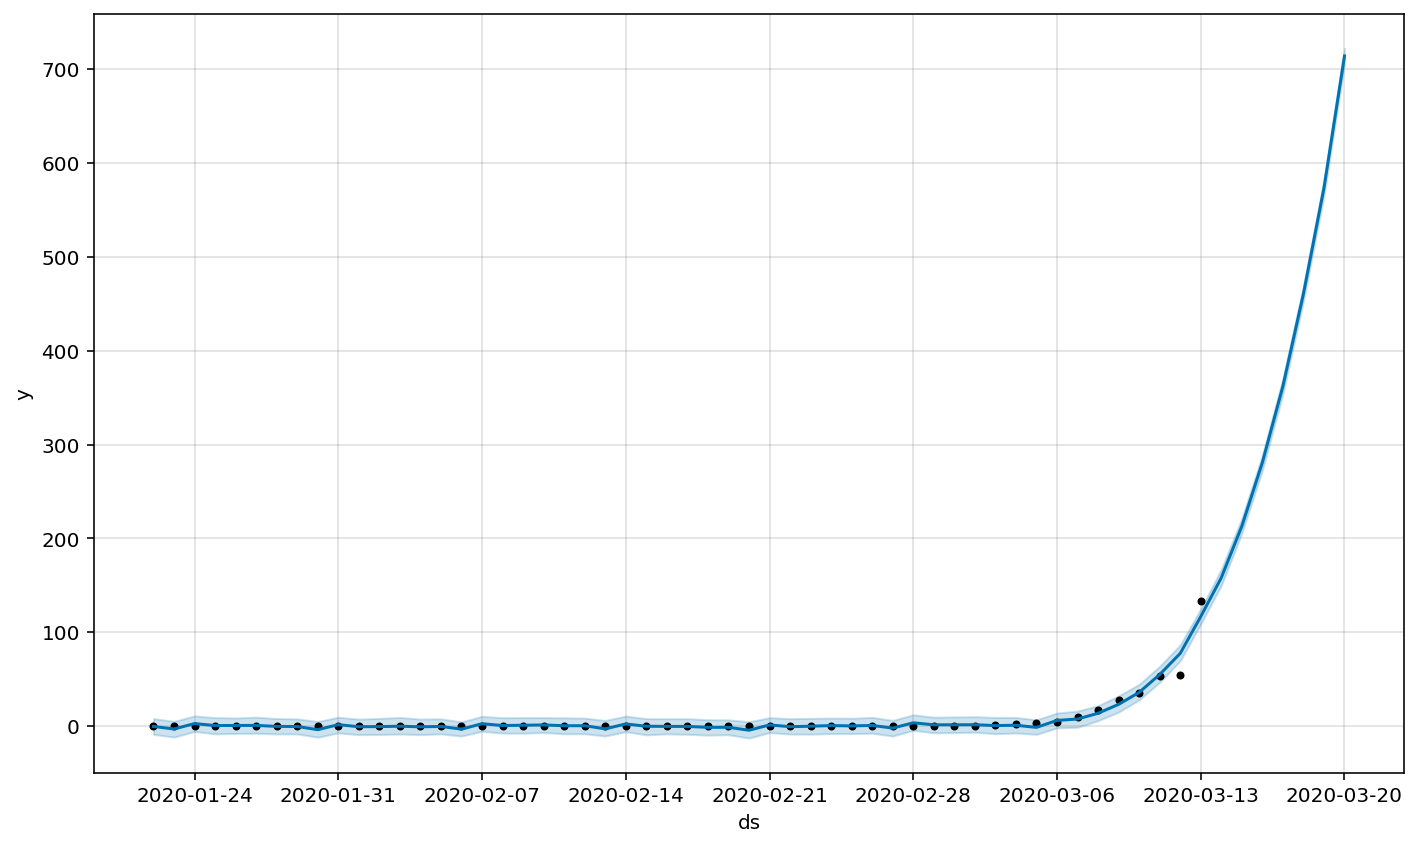

In [440]:
predictionDeathForecastSpain = Spain_modelDeath.predict(futureDeathPredictionSpain)
print('Prediction of Deceased case: \n', predictionDeathForecastSpain[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

Death_predictionSpain = Spain_modelDeath.plot(predictionDeathForecastSpain)

In [441]:
Spain_datadeath = data.groupby(["Date", "Country/Region"])[['Date', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
SpaingroupDeath = Spain_datadeath.loc[Spain_datadeath["Country/Region"] == "Spain"]
SpaingroupDeath = SpaingroupDeath[['Date', 'Deaths', 'Country/Region']].reset_index()
print(SpaingroupDeath)

    index       Date  Deaths Country/Region
0     110 2020-01-22       0          Spain
1     235 2020-01-23       0          Spain
2     360 2020-01-24       0          Spain
3     485 2020-01-25       0          Spain
4     610 2020-01-26       0          Spain
5     735 2020-01-27       0          Spain
6     860 2020-01-28       0          Spain
7     985 2020-01-29       0          Spain
8    1110 2020-01-30       0          Spain
9    1235 2020-01-31       0          Spain
10   1360 2020-02-01       0          Spain
11   1485 2020-02-02       0          Spain
12   1610 2020-02-03       0          Spain
13   1735 2020-02-04       0          Spain
14   1860 2020-02-05       0          Spain
15   1985 2020-02-06       0          Spain
16   2110 2020-02-07       0          Spain
17   2235 2020-02-08       0          Spain
18   2360 2020-02-09       0          Spain
19   2485 2020-02-10       0          Spain
20   2610 2020-02-11       0          Spain
21   2735 2020-02-12       0    

In [442]:
days_to_forecast = 7
fds_df = predictionDeathForecastSpain[['ds', 'yhat']]
fds_df.rename(columns={'yhat':'Deaths'}, inplace=True)
fds_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
fds_df.loc[fds_df['Deaths'] < 0, 'Deaths'] = 0
fds_df['Country/Region'] = 'Spain'
pds_val = fds_df.tail(7)
resultDeath_Spain = SpaingroupDeath.append(pds_val)
resultDeath_Spain = resultDeath_Spain[['Date', 'Deaths', 'Country/Region']]
print('Death result: \n', resultDeath_Spain)

Death result: 
          Date  Deaths Country/Region
0  2020-01-22       0          Spain
1  2020-01-23       0          Spain
2  2020-01-24       0          Spain
3  2020-01-25       0          Spain
4  2020-01-26       0          Spain
5  2020-01-27       0          Spain
6  2020-01-28       0          Spain
7  2020-01-29       0          Spain
8  2020-01-30       0          Spain
9  2020-01-31       0          Spain
10 2020-02-01       0          Spain
11 2020-02-02       0          Spain
12 2020-02-03       0          Spain
13 2020-02-04       0          Spain
14 2020-02-05       0          Spain
15 2020-02-06       0          Spain
16 2020-02-07       0          Spain
17 2020-02-08       0          Spain
18 2020-02-09       0          Spain
19 2020-02-10       0          Spain
20 2020-02-11       0          Spain
21 2020-02-12       0          Spain
22 2020-02-13       0          Spain
23 2020-02-14       0          Spain
24 2020-02-15       0          Spain
25 2020-02-16       0 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [443]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resultDeath_Spain['Date'], 
                         y=resultDeath_Spain['Deaths'],
                         mode='lines+markers',
                         name='Spain Death after predicction',
                         line=dict(color='firebrick', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortSpainDeath['Date'],
                y=sortSpainDeath['Deaths'],
                mode='lines+markers',
                name='Deaths before prediction',
                line=dict(color='Red', width=2)
                ))
fig.update_layout(
    title='Deceased cases in Spain based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

### Forecast for Iran

##### Iran confirmed case

In [444]:
Iranconfirmed.columns = ['ds','y']
Iranconfirmed.tail(10)

,ds,y
42,2020-03-04,2922
43,2020-03-05,3513
44,2020-03-06,4747
45,2020-03-07,5823
46,2020-03-08,6566
47,2020-03-09,7161
48,2020-03-10,8042
49,2020-03-11,9000
50,2020-03-12,10075
51,2020-03-13,11364


In [446]:
Iran_model = Prophet(yearly_seasonality=True,interval_width=0.95)
Iran_model.fit(Iranconfirmed)
futurePredictionIran = Iran_model.make_future_dataframe(periods=7)
futurePredictionIran_confirmed = futurePredictionIran.copy() 
futurePredictionIran.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of confirmed cases in Iran: 
            ds   yhat  yhat_lower  yhat_upper
0  2020-01-22     47        -195         272
1  2020-01-23    -46        -270         184
2  2020-01-24     10        -208         255
3  2020-01-25    -10        -242         220
4  2020-01-26    -22        -253         210
5  2020-01-27    -47        -268         173
6  2020-01-28     -2        -218         224
7  2020-01-29     -9        -260         223
8  2020-01-30      7        -243         234
9  2020-01-31    107        -129         356
10 2020-02-01     86        -166         319
11 2020-02-02     43        -178         278
12 2020-02-03    -26        -250         209
13 2020-02-04    -28        -251         209
14 2020-02-05    -74        -299         159
15 2020-02-06    -84        -302         164
16 2020-02-07      8        -227         252
17 2020-02-08     -5        -246         220
18 2020-02-09    -24        -265         179
19 2020-02-10    -58        -292         164
20 2020-02-11 

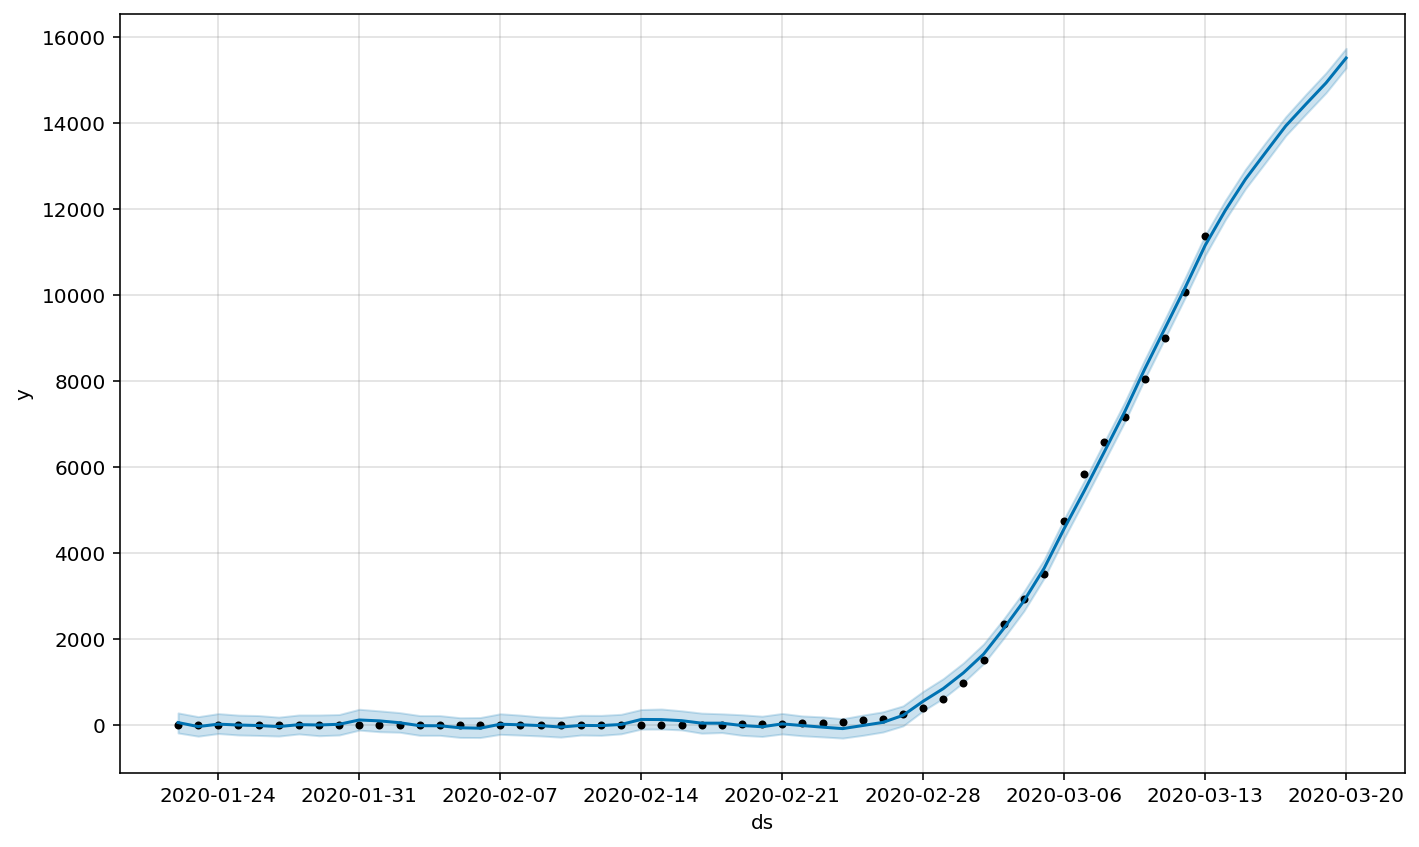

In [447]:
predictionForecastIran = Iran_model.predict(futurePredictionIran)
print('Prediction of confirmed cases in Iran: \n', predictionForecastIran[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

confirmed_predictionIran = Iran_model.plot(predictionForecastIran)

In [448]:
Irangroup = data2.loc[data2["Country/Region"] == "Iran"]
Irangroup = Irangroup[['Date', 'Confirmed', 'Country/Region']].reset_index()
print(Irangroup)

    index       Date  Confirmed Country/Region
0      58 2020-01-22          0           Iran
1     183 2020-01-23          0           Iran
2     308 2020-01-24          0           Iran
3     433 2020-01-25          0           Iran
4     558 2020-01-26          0           Iran
5     683 2020-01-27          0           Iran
6     808 2020-01-28          0           Iran
7     933 2020-01-29          0           Iran
8    1058 2020-01-30          0           Iran
9    1183 2020-01-31          0           Iran
10   1308 2020-02-01          0           Iran
11   1433 2020-02-02          0           Iran
12   1558 2020-02-03          0           Iran
13   1683 2020-02-04          0           Iran
14   1808 2020-02-05          0           Iran
15   1933 2020-02-06          0           Iran
16   2058 2020-02-07          0           Iran
17   2183 2020-02-08          0           Iran
18   2308 2020-02-09          0           Iran
19   2433 2020-02-10          0           Iran
20   2558 202

In [449]:
days_to_forecast = 7
fir_df = predictionForecastIran[['ds', 'yhat']]
fir_df.rename(columns={'yhat':'Confirmed'}, inplace=True)
fir_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
fir_df.loc[fir_df['Confirmed'] < 0, 'Confirmed'] = 0
fir_df['Country/Region'] = 'Iran'
pir_val = fir_df.tail(7)
result_Iran = Irangroup.append(pir_val)
result_Iran = result_Iran[['Date', 'Confirmed', 'Country/Region']]
print('result: \n', result_Iran)

result: 
          Date  Confirmed Country/Region
0  2020-01-22          0           Iran
1  2020-01-23          0           Iran
2  2020-01-24          0           Iran
3  2020-01-25          0           Iran
4  2020-01-26          0           Iran
5  2020-01-27          0           Iran
6  2020-01-28          0           Iran
7  2020-01-29          0           Iran
8  2020-01-30          0           Iran
9  2020-01-31          0           Iran
10 2020-02-01          0           Iran
11 2020-02-02          0           Iran
12 2020-02-03          0           Iran
13 2020-02-04          0           Iran
14 2020-02-05          0           Iran
15 2020-02-06          0           Iran
16 2020-02-07          0           Iran
17 2020-02-08          0           Iran
18 2020-02-09          0           Iran
19 2020-02-10          0           Iran
20 2020-02-11          0           Iran
21 2020-02-12          0           Iran
22 2020-02-13          0           Iran
23 2020-02-14          0      

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [450]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result_Iran['Date'], 
                         y=result_Iran['Confirmed'],
                         mode='lines+markers',
                         name='Iran Confirmed cases after Prediction',
                         line=dict(color='Dark Blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortIranconfirmed['Date'],
                y=sortIranconfirmed['Confirmed'],
                mode='lines+markers',
                name='Confirmed cases before prediction',
                line=dict(color='darkcyan', width=2)
                ))
fig.update_layout(
    title='Confirmed cases in Iran based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

##### Iran deceased case

In [451]:
IranDeath.columns = ['ds','y']
IranDeath.tail(10)

,ds,y
42,2020-03-04,92
43,2020-03-05,107
44,2020-03-06,124
45,2020-03-07,145
46,2020-03-08,194
47,2020-03-09,237
48,2020-03-10,291
49,2020-03-11,354
50,2020-03-12,429
51,2020-03-13,514


In [452]:
Iran_modelDeath = Prophet(yearly_seasonality=True, interval_width=0.95)
Iran_modelDeath.fit(IranDeath)
futureDeathPredictionIran = Iran_modelDeath.make_future_dataframe(periods=7)
futureDeathPredictionIran_confirmed = futureDeathPredictionIran.copy() 
futureDeathPredictionIran.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of Deceased case: 
            ds  yhat  yhat_lower  yhat_upper
0  2020-01-22     0          -3           4
1  2020-01-23     0          -4           3
2  2020-01-24    -1          -4           3
3  2020-01-25    -1          -5           2
4  2020-01-26     1          -3           4
5  2020-01-27     1          -3           4
6  2020-01-28     1          -3           4
7  2020-01-29     1          -3           4
8  2020-01-30     0          -3           4
9  2020-01-31    -1          -5           2
10 2020-02-01    -2          -6           2
11 2020-02-02     0          -3           3
12 2020-02-03    -0          -4           3
13 2020-02-04     0          -3           4
14 2020-02-05     1          -3           4
15 2020-02-06     0          -3           4
16 2020-02-07    -0          -4           3
17 2020-02-08    -1          -4           2
18 2020-02-09     1          -3           4
19 2020-02-10     1          -3           4
20 2020-02-11     1          -3           4
2

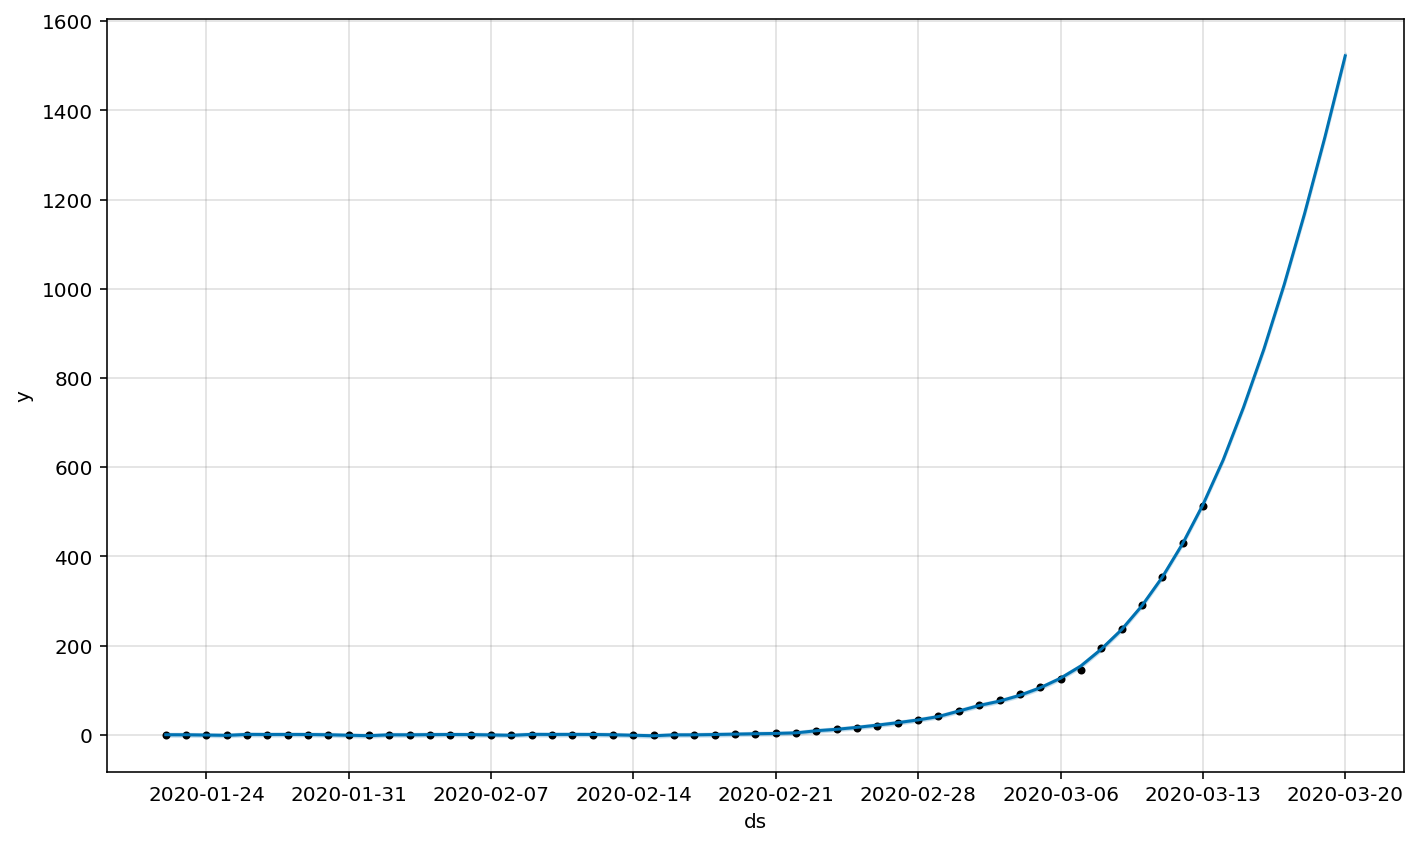

In [453]:
predictionDeathForecastIran = Iran_modelDeath.predict(futureDeathPredictionIran)
print('Prediction of Deceased case: \n', predictionDeathForecastIran[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

Death_predictionIran = Iran_modelDeath.plot(predictionDeathForecastIran)

In [454]:
Iran_datadeath = data.groupby(["Date", "Country/Region"])[['Date', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
IrangroupDeath = Iran_datadeath.loc[Iran_datadeath["Country/Region"] == "Iran"]
IrangroupDeath = IrangroupDeath[['Date', 'Deaths', 'Country/Region']].reset_index()
print(IrangroupDeath)

    index       Date  Deaths Country/Region
0      58 2020-01-22       0           Iran
1     183 2020-01-23       0           Iran
2     308 2020-01-24       0           Iran
3     433 2020-01-25       0           Iran
4     558 2020-01-26       0           Iran
5     683 2020-01-27       0           Iran
6     808 2020-01-28       0           Iran
7     933 2020-01-29       0           Iran
8    1058 2020-01-30       0           Iran
9    1183 2020-01-31       0           Iran
10   1308 2020-02-01       0           Iran
11   1433 2020-02-02       0           Iran
12   1558 2020-02-03       0           Iran
13   1683 2020-02-04       0           Iran
14   1808 2020-02-05       0           Iran
15   1933 2020-02-06       0           Iran
16   2058 2020-02-07       0           Iran
17   2183 2020-02-08       0           Iran
18   2308 2020-02-09       0           Iran
19   2433 2020-02-10       0           Iran
20   2558 2020-02-11       0           Iran
21   2683 2020-02-12       0    

In [455]:
days_to_forecast = 7
fdir_df = predictionDeathForecastIran[['ds', 'yhat']]
fdir_df.rename(columns={'yhat':'Deaths'}, inplace=True)
fdir_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
fdir_df.loc[fdir_df['Deaths'] < 0, 'Deaths'] = 0
fdir_df['Country/Region'] = 'Iran'
pdir_val = fdir_df.tail(7)
resultDeath_Iran = IrangroupDeath.append(pdir_val)
resultDeath_Iran = resultDeath_Iran[['Date', 'Deaths', 'Country/Region']]
print('Death result: \n', resultDeath_Iran)

Death result: 
          Date  Deaths Country/Region
0  2020-01-22       0           Iran
1  2020-01-23       0           Iran
2  2020-01-24       0           Iran
3  2020-01-25       0           Iran
4  2020-01-26       0           Iran
5  2020-01-27       0           Iran
6  2020-01-28       0           Iran
7  2020-01-29       0           Iran
8  2020-01-30       0           Iran
9  2020-01-31       0           Iran
10 2020-02-01       0           Iran
11 2020-02-02       0           Iran
12 2020-02-03       0           Iran
13 2020-02-04       0           Iran
14 2020-02-05       0           Iran
15 2020-02-06       0           Iran
16 2020-02-07       0           Iran
17 2020-02-08       0           Iran
18 2020-02-09       0           Iran
19 2020-02-10       0           Iran
20 2020-02-11       0           Iran
21 2020-02-12       0           Iran
22 2020-02-13       0           Iran
23 2020-02-14       0           Iran
24 2020-02-15       0           Iran
25 2020-02-16       0 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [456]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resultDeath_Iran['Date'], 
                         y=resultDeath_Iran['Deaths'],
                         mode='lines+markers',
                         name='Iran Death after predicction',
                         line=dict(color='firebrick', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortIranDeath['Date'],
                y=sortIranDeath['Deaths'],
                mode='lines+markers',
                name='Deaths before prediction',
                line=dict(color='Red', width=2)
                ))
fig.update_layout(
    title='Deceased cases in Iran based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

### Forecast for China

##### China confirmed case

In [386]:
Chinaconfirmed.columns = ['ds','y']
Chinaconfirmed.tail(10)

,ds,y
42,2020-03-04,80386
43,2020-03-05,80537
44,2020-03-06,80690
45,2020-03-07,80770
46,2020-03-08,80823
47,2020-03-09,80860
48,2020-03-10,80887
49,2020-03-11,80921
50,2020-03-12,80932
51,2020-03-13,80945


In [399]:
china_model = Prophet(daily_seasonality=True,interval_width=0.95)
china_model.fit(Chinaconfirmed)
futurePredictionChina = china_model.make_future_dataframe(periods=7)
futurePredictionChina_confirmed = futurePredictionChina.copy() 
futurePredictionChina.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of confirmed cases in China: 
            ds    yhat  yhat_lower  yhat_upper
0  2020-01-22 -10,167     -18,359      -1,552
1  2020-01-23  -6,540     -14,640       1,714
2  2020-01-24  -3,703     -11,362       4,269
3  2020-01-25    -778      -8,457       7,523
4  2020-01-26   1,868      -6,455      10,346
5  2020-01-27   4,175      -3,840      13,156
6  2020-01-28   6,811      -1,239      15,185
7  2020-01-29  10,226       1,887      18,746
8  2020-01-30  13,854       5,405      21,350
9  2020-01-31  16,691       8,115      24,850
10 2020-02-01  19,616      10,770      28,037
11 2020-02-02  22,263      14,648      30,535
12 2020-02-03  24,571      16,719      32,585
13 2020-02-04  27,208      18,916      35,442
14 2020-02-05  30,625      22,299      38,420
15 2020-02-06  34,253      25,932      42,486
16 2020-02-07  37,091      29,022      45,606
17 2020-02-08  40,017      31,989      47,898
18 2020-02-09  42,664      33,747      51,240
19 2020-02-10  44,972      37,037     

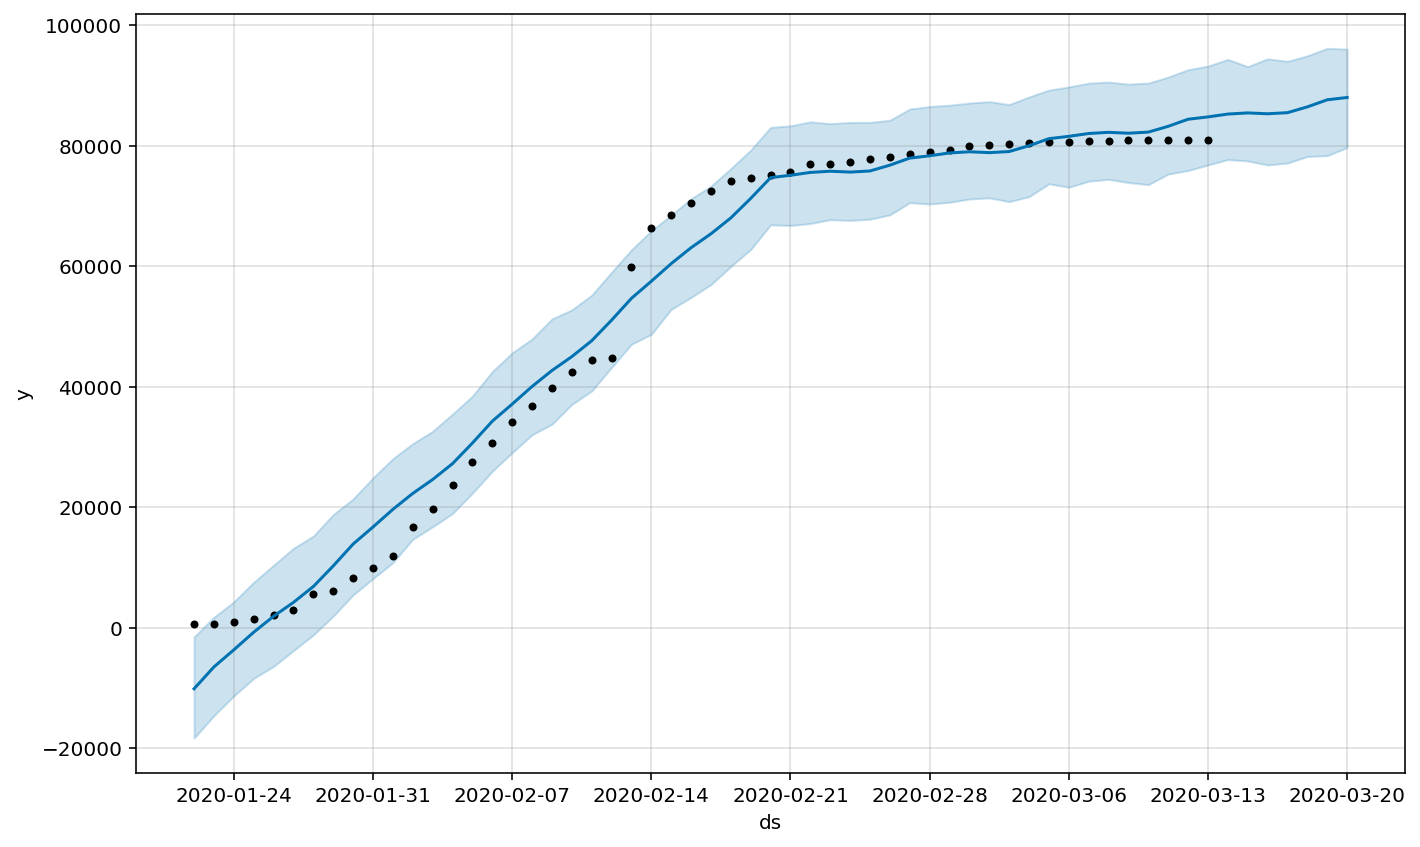

In [400]:
predictionForecastChina = china_model.predict(futurePredictionChina)
print('Prediction of confirmed cases in China: \n', predictionForecastChina[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

confirmed_predictionChina = china_model.plot(predictionForecastChina)

In [391]:
chinagroup = data2.loc[data2["Country/Region"] == "China"]
chinagroup = chinagroup[['Date', 'Confirmed', 'Country/Region']].reset_index()
print(chinagroup)

    index       Date  Confirmed Country/Region
0      27 2020-01-22        548          China
1     152 2020-01-23        643          China
2     277 2020-01-24        920          China
3     402 2020-01-25       1406          China
4     527 2020-01-26       2075          China
5     652 2020-01-27       2877          China
6     777 2020-01-28       5509          China
7     902 2020-01-29       6087          China
8    1027 2020-01-30       8141          China
9    1152 2020-01-31       9802          China
10   1277 2020-02-01      11891          China
11   1402 2020-02-02      16630          China
12   1527 2020-02-03      19716          China
13   1652 2020-02-04      23707          China
14   1777 2020-02-05      27440          China
15   1902 2020-02-06      30587          China
16   2027 2020-02-07      34110          China
17   2152 2020-02-08      36814          China
18   2277 2020-02-09      39829          China
19   2402 2020-02-10      42354          China
20   2527 202

In [401]:
days_to_forecast = 7
fc_df = predictionForecastChina[['ds', 'yhat']]
fc_df.rename(columns={'yhat':'Confirmed'}, inplace=True)
fc_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
fc_df.loc[fc_df['Confirmed'] < 0, 'Confirmed'] = 0
fc_df['Country/Region'] = 'China'
pc_val = fc_df.tail(7)
result_China = chinagroup.append(pc_val)
result_China = result_China[['Date', 'Confirmed', 'Country/Region']]
print('result: \n', result_China)

result: 
          Date  Confirmed Country/Region
0  2020-01-22        548          China
1  2020-01-23        643          China
2  2020-01-24        920          China
3  2020-01-25      1,406          China
4  2020-01-26      2,075          China
5  2020-01-27      2,877          China
6  2020-01-28      5,509          China
7  2020-01-29      6,087          China
8  2020-01-30      8,141          China
9  2020-01-31      9,802          China
10 2020-02-01     11,891          China
11 2020-02-02     16,630          China
12 2020-02-03     19,716          China
13 2020-02-04     23,707          China
14 2020-02-05     27,440          China
15 2020-02-06     30,587          China
16 2020-02-07     34,110          China
17 2020-02-08     36,814          China
18 2020-02-09     39,829          China
19 2020-02-10     42,354          China
20 2020-02-11     44,386          China
21 2020-02-12     44,759          China
22 2020-02-13     59,895          China
23 2020-02-14     66,358      

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [402]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result_China['Date'], 
                         y=result_China['Confirmed'],
                         mode='lines+markers',
                         name='China Confirmed cases after Prediction',
                         line=dict(color='Dark Blue', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortChinaconfirmed['Date'],
                y=sortChinaconfirmed['Confirmed'],
                mode='lines+markers',
                name='Confirmed cases before prediction',
                line=dict(color='darkcyan', width=2)
                ))
fig.update_layout(
    title='Confirmed cases in China based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)

##### China deceased case prediction

In [403]:
ChinaDeath.columns = ['ds','y']
ChinaDeath.tail(10)

,ds,y
42,2020-03-04,2983
43,2020-03-05,3015
44,2020-03-06,3044
45,2020-03-07,3072
46,2020-03-08,3100
47,2020-03-09,3123
48,2020-03-10,3139
49,2020-03-11,3161
50,2020-03-12,3172
51,2020-03-13,3180


In [404]:
China_modelDeath = Prophet(daily_seasonality=True, interval_width=0.95)
China_modelDeath.fit(ChinaDeath)
futureDeathPredictionChina = China_modelDeath.make_future_dataframe(periods=7)
futureDeathPredictionChina_confirmed = futureDeathPredictionChina.copy() 
futureDeathPredictionChina.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
49,2020-03-11
50,2020-03-12
51,2020-03-13
52,2020-03-14
53,2020-03-15
54,2020-03-16
55,2020-03-17
56,2020-03-18
57,2020-03-19
58,2020-03-20


Prediction of Deceased case: 
            ds  yhat  yhat_lower  yhat_upper
0  2020-01-22    23         -31          71
1  2020-01-23    23         -27          76
2  2020-01-24    13         -38          61
3  2020-01-25    40          -6          87
4  2020-01-26    49          -4         103
5  2020-01-27    84          33         132
6  2020-01-28   119          69         169
7  2020-01-29   134          84         187
8  2020-01-30   192         143         238
9  2020-01-31   230         180         278
10 2020-02-01   297         248         345
11 2020-02-02   343         289         395
12 2020-02-03   411         366         457
13 2020-02-04   480         429         530
14 2020-02-05   530         483         579
15 2020-02-06   624         575         674
16 2020-02-07   701         651         748
17 2020-02-08   811         765         865
18 2020-02-09   901         852         954
19 2020-02-10 1,016         965       1,068
20 2020-02-11 1,132       1,080       1,184
2

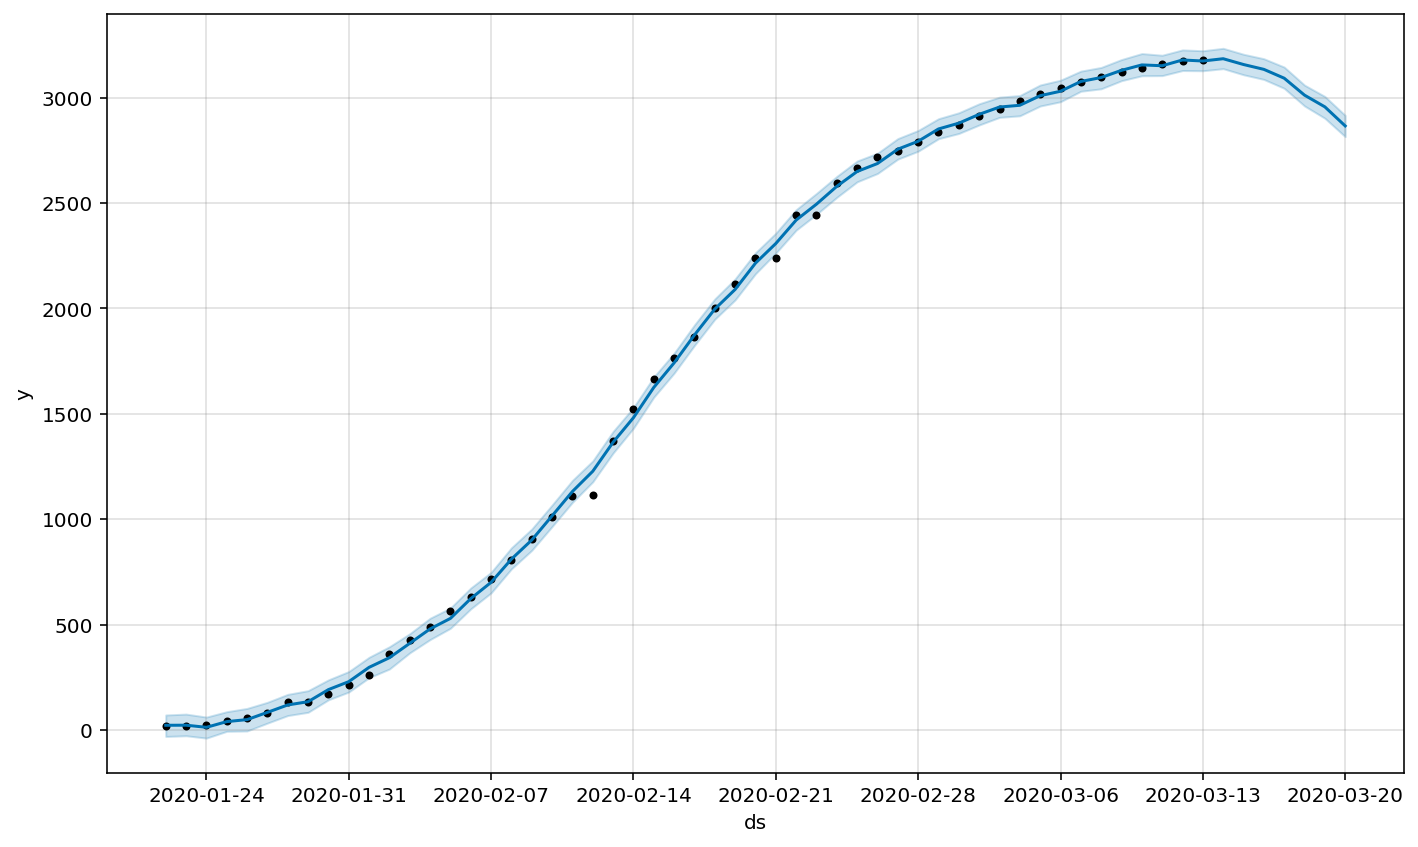

In [405]:
predictionDeathForecastChina = China_modelDeath.predict(futureDeathPredictionChina)
print('Prediction of Deceased case: \n', predictionDeathForecastChina[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

Death_predictionChina = China_modelDeath.plot(predictionDeathForecastChina)

In [407]:
China_datadeath = data.groupby(["Date", "Country/Region"])[['Date', 'Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
ChinagroupDeath = China_datadeath.loc[China_datadeath["Country/Region"] == "China"]
ChinagroupDeath = ChinagroupDeath[['Date', 'Deaths', 'Country/Region']].reset_index()
print(ChinagroupDeath)

    index       Date  Deaths Country/Region
0      27 2020-01-22      17          China
1     152 2020-01-23      18          China
2     277 2020-01-24      26          China
3     402 2020-01-25      42          China
4     527 2020-01-26      56          China
5     652 2020-01-27      82          China
6     777 2020-01-28     131          China
7     902 2020-01-29     133          China
8    1027 2020-01-30     171          China
9    1152 2020-01-31     213          China
10   1277 2020-02-01     259          China
11   1402 2020-02-02     361          China
12   1527 2020-02-03     425          China
13   1652 2020-02-04     491          China
14   1777 2020-02-05     563          China
15   1902 2020-02-06     633          China
16   2027 2020-02-07     718          China
17   2152 2020-02-08     805          China
18   2277 2020-02-09     905          China
19   2402 2020-02-10    1012          China
20   2527 2020-02-11    1112          China
21   2652 2020-02-12    1117    

In [408]:
days_to_forecast = 7
fdc_df = predictionDeathForecastChina[['ds', 'yhat']]
fdc_df.rename(columns={'yhat':'Deaths'}, inplace=True)
fdc_df.rename(columns={'ds':'Date'}, inplace=True)
pd.options.display.float_format = '{:,.0f}'.format
fdc_df.loc[fdc_df['Deaths'] < 0, 'Deaths'] = 0
fdc_df['Country/Region'] = 'China'
pdc_val = fdc_df.tail(7)
resultDeath_China = ChinagroupDeath.append(pdc_val)
resultDeath_China = resultDeath_China[['Date', 'Deaths', 'Country/Region']]
print('Death result: \n', resultDeath_China)

Death result: 
          Date  Deaths Country/Region
0  2020-01-22      17          China
1  2020-01-23      18          China
2  2020-01-24      26          China
3  2020-01-25      42          China
4  2020-01-26      56          China
5  2020-01-27      82          China
6  2020-01-28     131          China
7  2020-01-29     133          China
8  2020-01-30     171          China
9  2020-01-31     213          China
10 2020-02-01     259          China
11 2020-02-02     361          China
12 2020-02-03     425          China
13 2020-02-04     491          China
14 2020-02-05     563          China
15 2020-02-06     633          China
16 2020-02-07     718          China
17 2020-02-08     805          China
18 2020-02-09     905          China
19 2020-02-10   1,012          China
20 2020-02-11   1,112          China
21 2020-02-12   1,117          China
22 2020-02-13   1,369          China
23 2020-02-14   1,521          China
24 2020-02-15   1,663          China
25 2020-02-16   1,766 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [409]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=resultDeath_China['Date'], 
                         y=resultDeath_China['Deaths'],
                         mode='lines+markers',
                         name='China Death after predicction',
                         line=dict(color='firebrick', width=2)
                        ))
fig.add_trace(go.Scatter(x=sortChinaDeath['Date'],
                y=sortChinaDeath['Deaths'],
                mode='lines+markers',
                name='Deaths before prediction',
                line=dict(color='Red', width=2)
                ))
fig.update_layout(
    title='Deceased cases in China based on prediction',
    xaxis_title='Date',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number of Cases',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    )
)